# Project (Exploratory Data Analysis)

## Problem Statement:
To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above).

## Objective: 
To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
data = pd.read_csv("appstore_games.csv")
data.head()

URL         ID  \
0   https://apps.apple.com/us/app/sudoku/id284921427  284921427   
1  https://apps.apple.com/us/app/reversi/id284926400  284926400   
2  https://apps.apple.com/us/app/morocco/id284946595  284946595   
3  https://apps.apple.com/us/app/sudoku-free/id28...  285755462   
4  https://apps.apple.com/us/app/senet-deluxe/id2...  285831220   

            Name Subtitle                                           Icon URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average User Rating  User Rating Count  Price In-app Purchases  \
0                  4.0             3553.0   2.99              NaN   
1                  3.5              284.0   1.99              NaN   
2                  3.0             8376.0   0.00              NaN   
3                  3.5           190394.0   0.00              NaN   
4                  3.5               28.0   2.99              NaN   

                                         Description  \
0  Join over 21,000,000 of our fans and download ...   
1  The classic game of Reversi, also known as Oth...   
2  Play the classic strategy game Othello (also k...   
3  Top 100 free app for over a year.\nRated "Best...   
4  "Senet Deluxe - The Ancient Game of Life and A...   

                  Developer Age Rating  \
0  Mighty Mighty Good Games         4+   
1          Kiss The Machine         4+   
2               Bayou Games         4+   
3  Mighty Mighty Good Games         4+   
4           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

  Primary Genre                             Genres Original Release Date  \
0         Games            Games, Strategy, Puzzle            11/07/2008   
1         Games             Games, Strategy, Board            11/07/2008   
2         Games             Games, Board, Strategy            11/07/2008   
3         Games            Games, Strategy, Puzzle            23/07/2008   
4         Games  Games, Strategy, Board, Education            18/07/2008   

  Current Version Release Date  
0                   30/05/2017  
1                   17/05/2018  
2                    5/09/2017  
3                   30/05/2017  
4                   22/07/2018

## Understanding the Data Set<br>

In [3]:
data.shape

(17007, 18)

In [4]:
data.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

### It seems that dataset is having some missing values

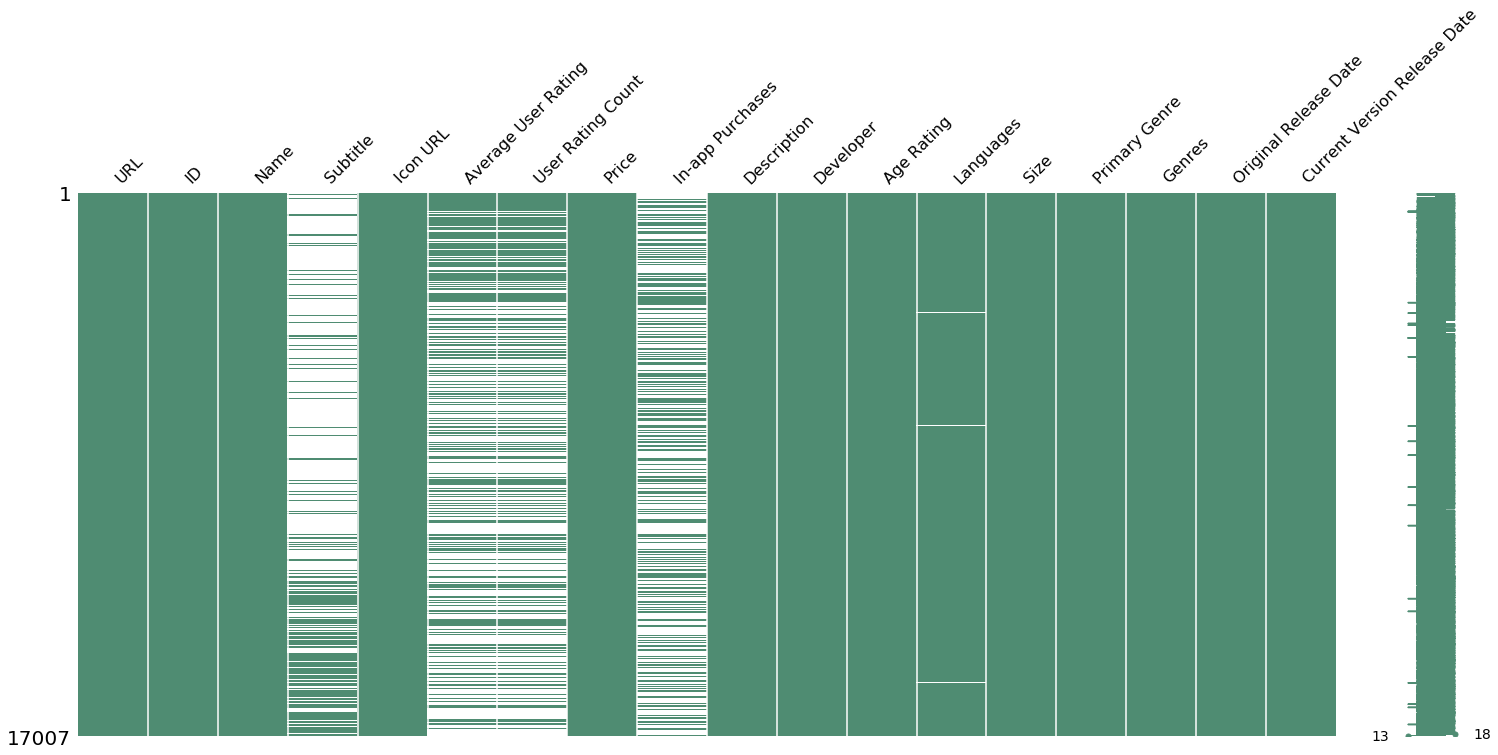

In [6]:
import missingno as msno
msno.matrix(data,color=(0.31, 0.55, 0.45))
plt.show()

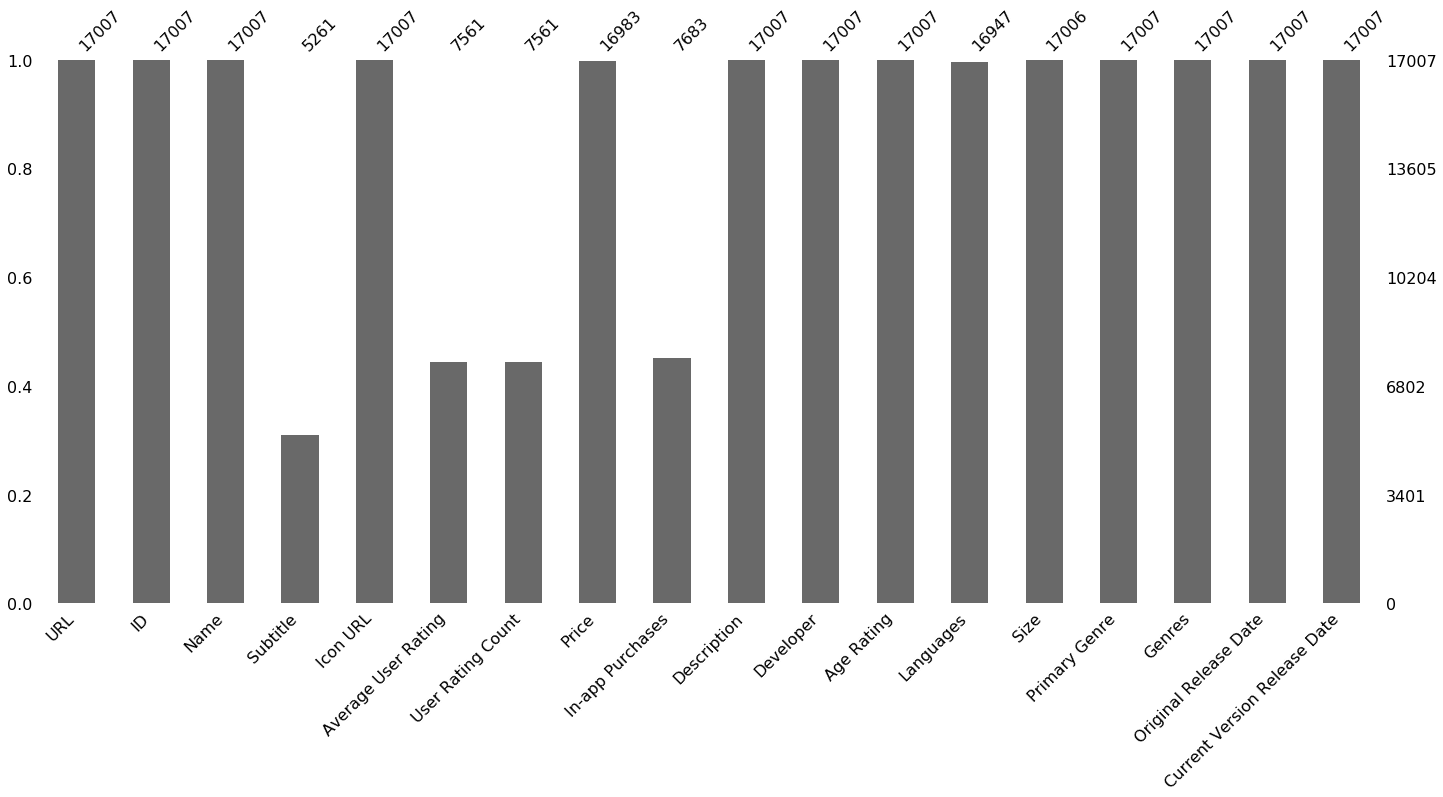

In [7]:
msno.bar(data) 

### Size of the Apps<br>

In [8]:
print("Maximum App Size",np.max(data['Size'].dropna())/1000000,"MB")
print("Minimum App Size",np.min(data['Size'].dropna())/1000000,"MB")

Maximum App Size 4005.59104 MB
Minimum App Size 0.051328 MB


C:\Users\manoj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\manoj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


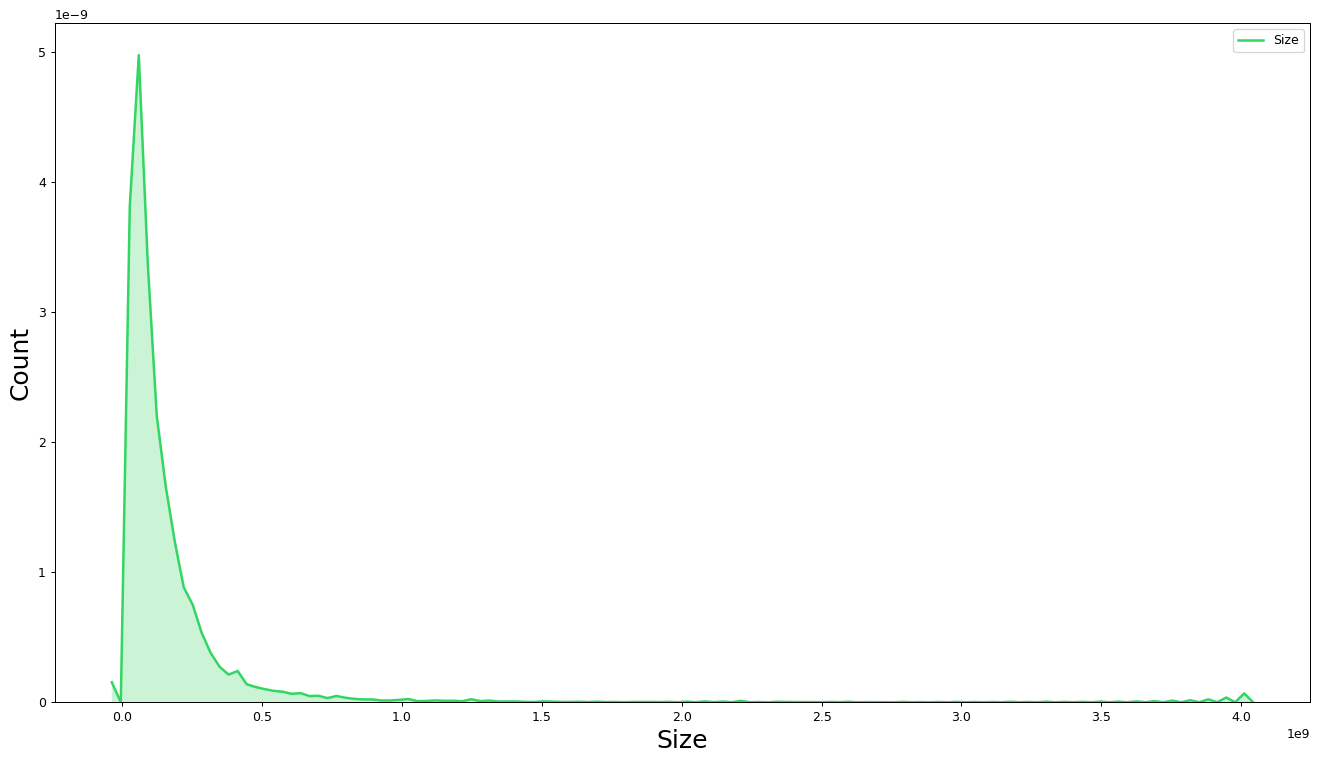

In [9]:
plt.figure(figsize=(18,10),dpi=90)
siz = sns.kdeplot(data['Size'], shade = True, linewidth = 2, color = '#33d662')
siz.set_ylabel('Count', fontsize = 20)
siz.set_xlabel('Size', fontsize = 20)
plt.show()

### Most of the apps size fall in between 0 - 500 Mega bytes

### Price of the Apps<br>

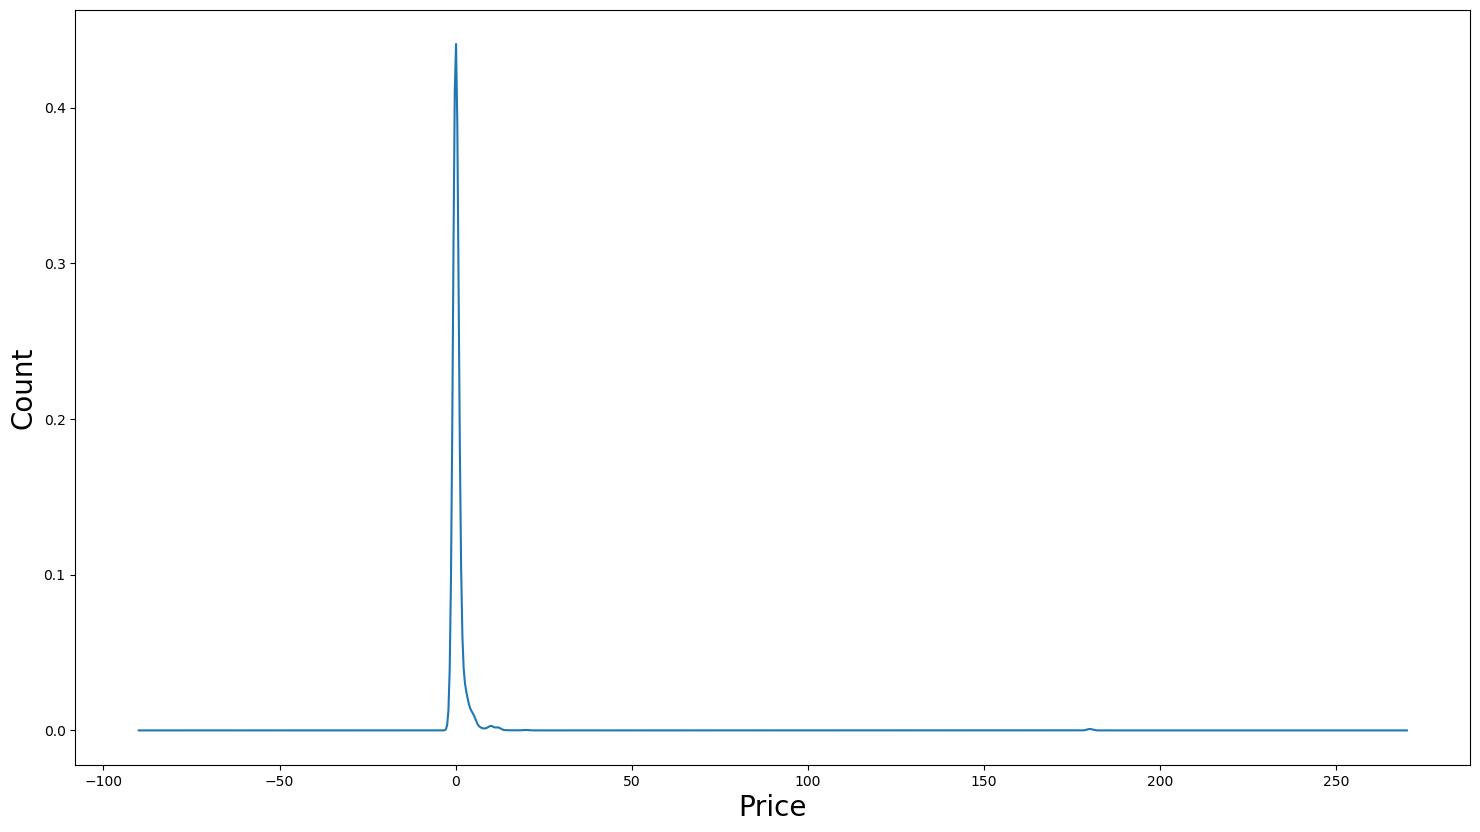

In [10]:
plt.figure(figsize=(18,10),dpi=100)
data['Price'].plot.kde(bw_method=0.1)
plt.xlabel("Price",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

### We can observe that most of the apps are free<br>

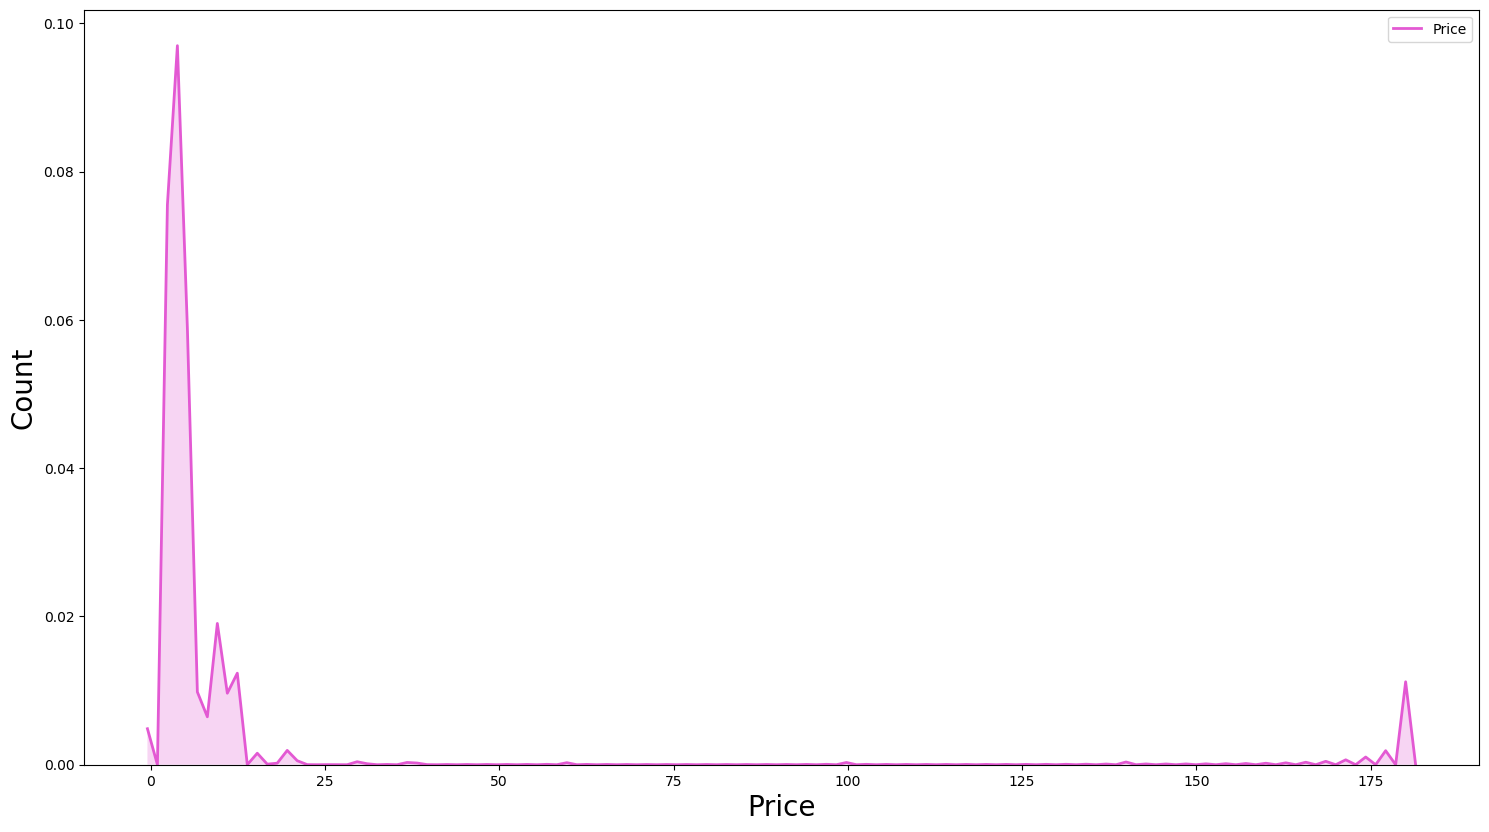

In [11]:
plt.figure(figsize=(18,10),dpi=100)
df = data[data['Price'] > 0.0]
price = sns.kdeplot(df['Price'], shade=True, color = '#e359d3', linewidth=2 )
price.set_ylabel('Count', fontsize = 20)
price.set_xlabel('Price', fontsize = 20)
plt.show()

### Most of the paid apps price fall in between 0 - 10 , while some cost high from 175 - 200

### User Rating Count<br>

C:\Users\manoj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\manoj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


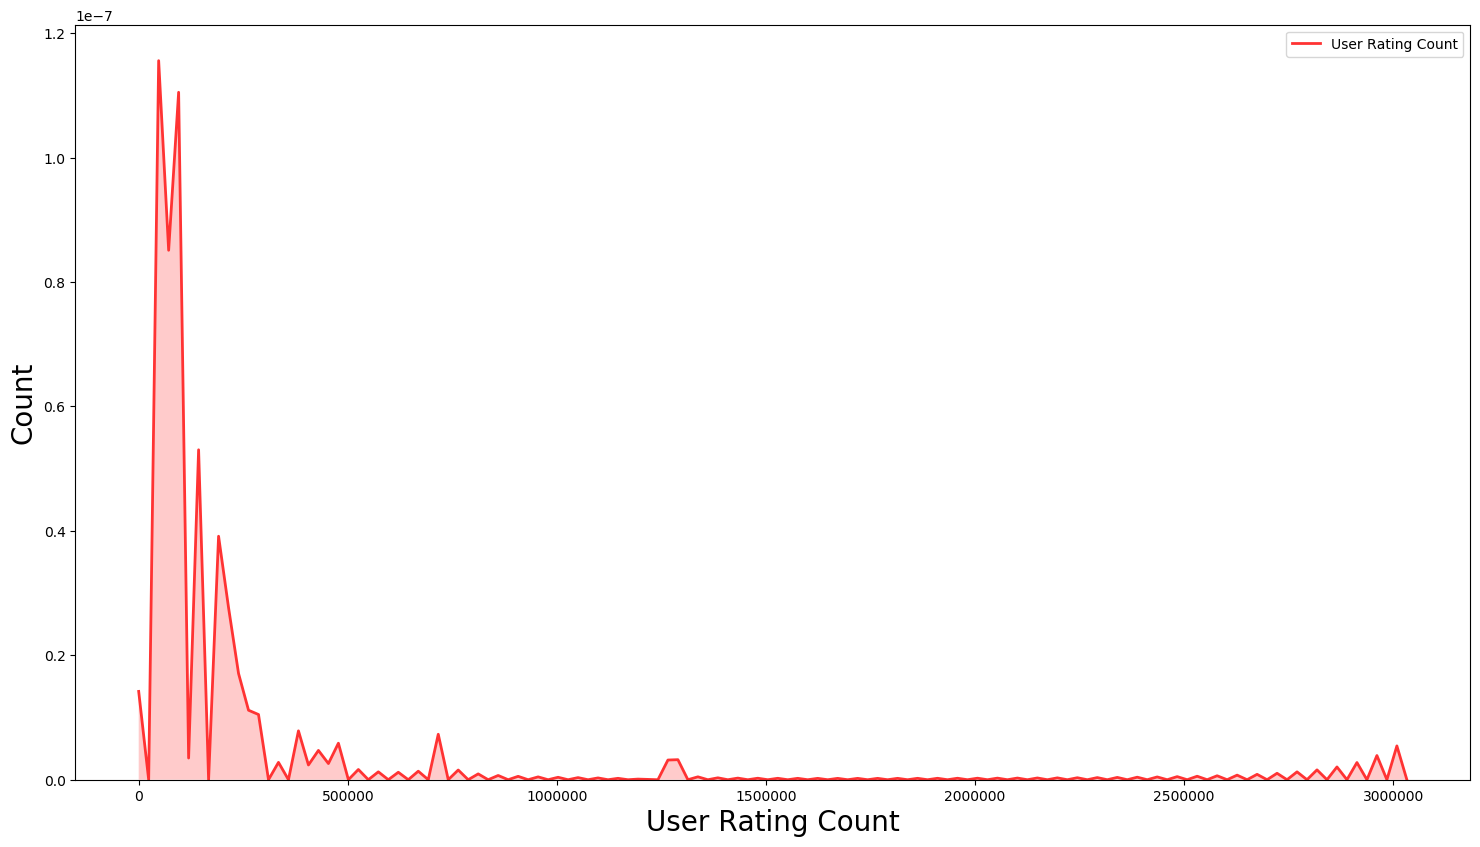

In [12]:
plt.figure(figsize=(18,10),dpi=100)
rate = sns.kdeplot(data['User Rating Count'], shade = True, linewidth = 2, color = '#ff3333')
rate.set_ylabel('Count', fontsize = 20)
rate.set_xlabel('User Rating Count', fontsize = 20)
plt.show()

### Only few apps have more number of users

### Configuring the data type of Original Release Date , Current Version Release Date<br>

In [13]:
data['Original Release Date'] = data['Original Release Date'].str.replace("/","-")
data['Current Version Release Date'] = data['Current Version Release Date'].str.replace("/","-")

In [14]:
data['Original Release Date'] = pd.to_datetime(data['Original Release Date'],dayfirst=True)
data['Current Version Release Date'] = pd.to_datetime(data['Current Version Release Date'],dayfirst=True)

In [15]:
data['Release_Year'] = data['Original Release Date']
data['Release_Month'] = data['Original Release Date']

In [16]:
data['Release_Year'] = data['Release_Year'].map(lambda x: x.year)
data['Release_Month'] = data['Release_Month'].map(lambda x: x.month)

### To calculate days since last updated we require the present date , which means that date of latest Current Version Release date and Original Release Date of App must be same and Average User Rating , User Rating Count must be null or 0 <br>

In [17]:
lt_date = []
def Latest_Date(x):
    if(x['Current Version Release Date'] == x['Original Release Date']):
        if((np.isnan(x['Average User Rating'])) and (np.isnan(x['User Rating Count']))):
            lt_date.append(x['Current Version Release Date'])
    
data.apply(Latest_Date,axis=1)
present_date = max(lt_date)
data['Days_Since_Last_Updated'] = data['Current Version Release Date']

In [18]:
print("Present Date :",present_date)

Present Date : 2019-10-26 00:00:00


In [19]:
data['Days_Since_Last_Updated'] = data['Days_Since_Last_Updated'].map(lambda x: present_date - x)
data['Days_Since_Last_Updated'] = data['Days_Since_Last_Updated'].map(lambda x: x.days)

In [20]:
data['Service_Period'] = data['Original Release Date']

In [21]:
data['Service_Period'] = data['Service_Period'].map(lambda x: present_date-x)
data['Service_Period'] = data['Service_Period'].map(lambda x: x.days)

### Release of apps over the years<br>

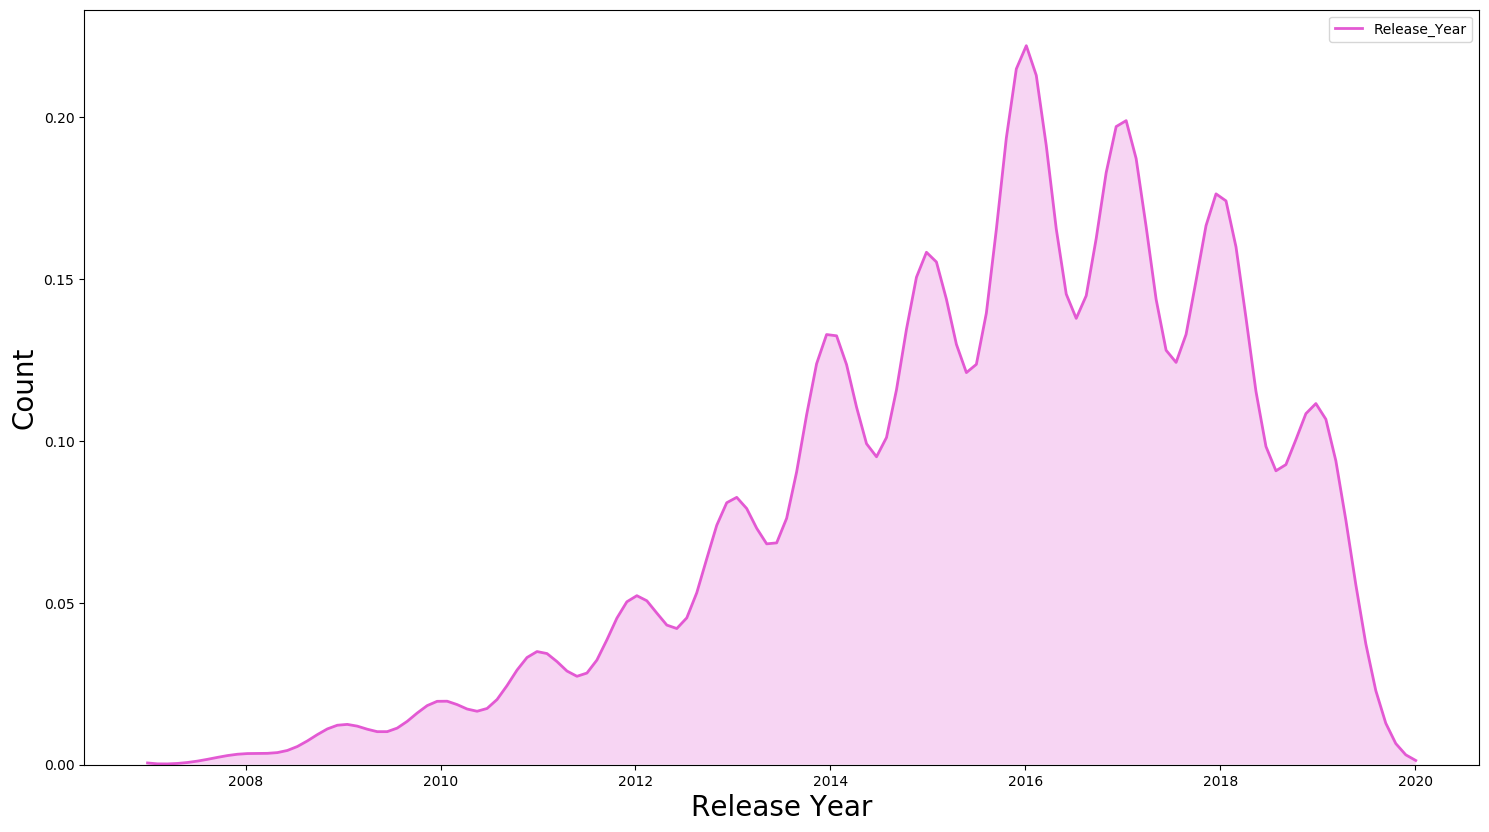

In [22]:
plt.figure(figsize=(18,10),dpi=100)
sns.kdeplot(data['Release_Year'], shade = True, linewidth = 2, color = '#e359d3')
plt.xlabel('Release Year', fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

### Year 2016 marked the highest release of apps
### Over the years , apps releasing into the market increased<br>

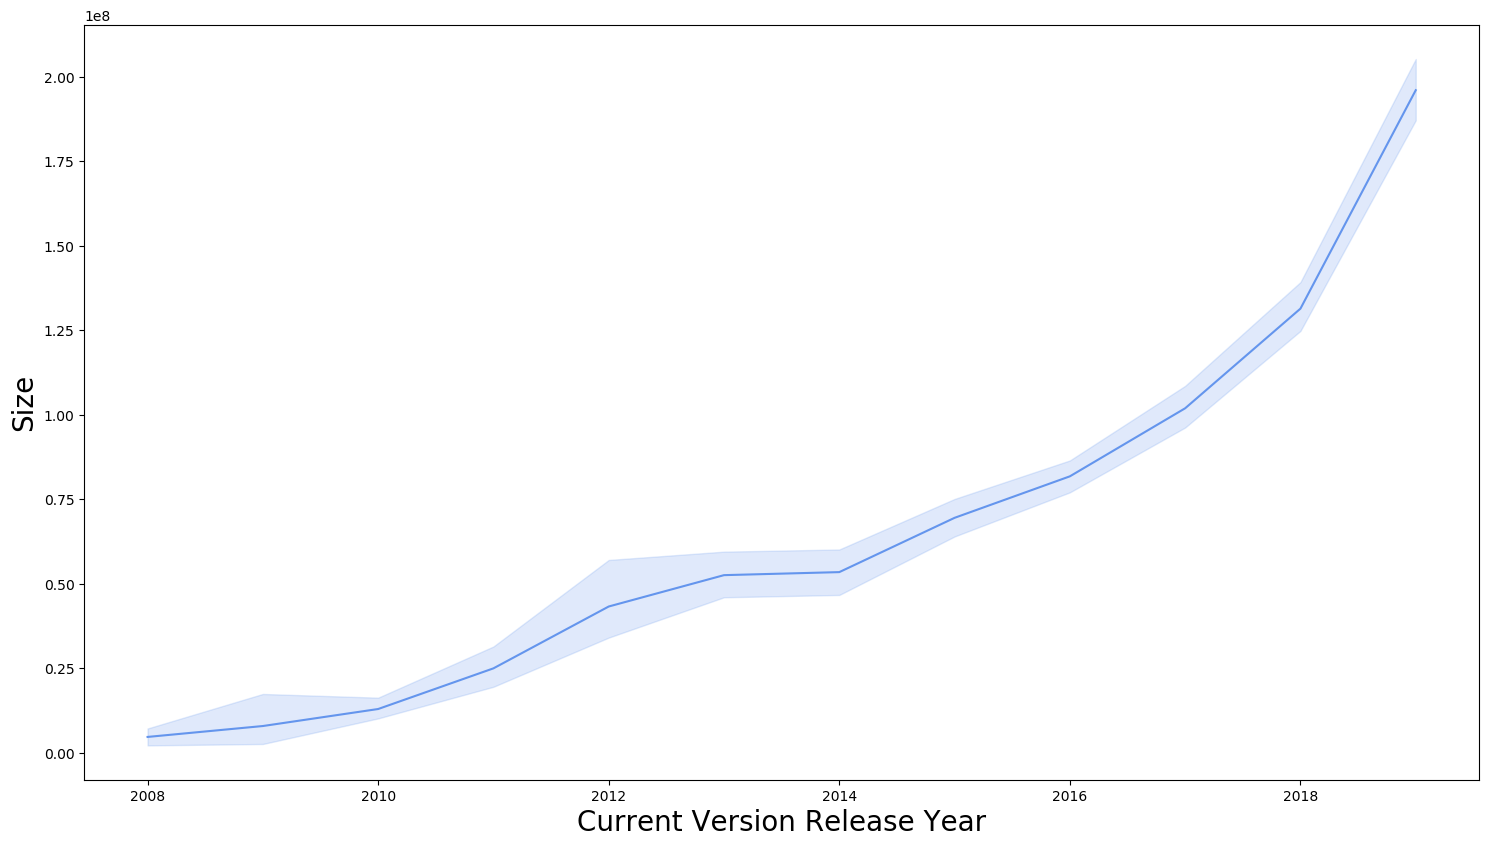

In [23]:
plt.figure(figsize=(18,10),dpi=100)
data['Curent_Version_Release_Year'] = data['Current Version Release Date']
data['Curent_Version_Release_Year'] = data['Curent_Version_Release_Year'].map(lambda x: x.year)
sns.lineplot(data = data, x = 'Curent_Version_Release_Year', y='Size' , color = 'cornflowerblue')
plt.xlabel('Current Version Release Year', fontsize = 20)
plt.ylabel('Size',fontsize = 20)
plt.show()

### Apps show increase in size since the latest update i.e apps which are recently updated are bulky in size<br>

In [24]:
data.head()

URL         ID  \
0   https://apps.apple.com/us/app/sudoku/id284921427  284921427   
1  https://apps.apple.com/us/app/reversi/id284926400  284926400   
2  https://apps.apple.com/us/app/morocco/id284946595  284946595   
3  https://apps.apple.com/us/app/sudoku-free/id28...  285755462   
4  https://apps.apple.com/us/app/senet-deluxe/id2...  285831220   

            Name Subtitle                                           Icon URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average User Rating  User Rating Count  Price In-app Purchases  \
0                  4.0             3553.0   2.99              NaN   
1                  3.5              284.0   1.99              NaN   
2                  3.0             8376.0   0.00              NaN   
3                  3.5           190394.0   0.00              NaN   
4                  3.5               28.0   2.99              NaN   

                                         Description  ...        Size  \
0  Join over 21,000,000 of our fans and download ...  ...  15853568.0   
1  The classic game of Reversi, also known as Oth...  ...  12328960.0   
2  Play the classic strategy game Othello (also k...  ...    674816.0   
3  Top 100 free app for over a year.\nRated "Best...  ...  21552128.0   
4  "Senet Deluxe - The Ancient Game of Life and A...  ...  34689024.0   

  Primary Genre                             Genres  Original Release Date  \
0         Games            Games, Strategy, Puzzle             2008-07-11   
1         Games             Games, Strategy, Board             2008-07-11   
2         Games             Games, Board, Strategy             2008-07-11   
3         Games            Games, Strategy, Puzzle             2008-07-23   
4         Games  Games, Strategy, Board, Education             2008-07-18   

  Current Version Release Date Release_Year Release_Month  \
0                   2017-05-30         2008             7   
1                   2018-05-17         2008             7   
2                   2017-09-05         2008             7   
3                   2017-05-30         2008             7   
4                   2018-07-22         2008             7   

  Days_Since_Last_Updated  Service_Period  Curent_Version_Release_Year  
0                     879            4124                         2017  
1                     527            4124                         2018  
2                     781            4124                         2017  
3                     879            4112                         2017  
4                     461            4117                         2018  

[5 rows x 23 columns]

## Cleaning the Data<br>

In [25]:
print(data['Icon URL'].nunique())
print(data['URL'].nunique())
print(data['ID'].nunique())
print(data['Description'].nunique())

16847
16847
16847
16473


#### Almost 95% of Icon URL , URL , ID , Description columns are having 'unique' values.
#### Which means almost every row in the dataset can be indentified uniquely with ID , URL , Icon URL.
#### So ID , URL , Icon URL can be used as index for the dataset, having more columns as indexes for the same dataset does not infer anything. Same as with Description.
#### Thus we remove ID , URL , Icon URL , Description columns from the dataset.<br>

In [26]:
data.drop(['Icon URL','URL','ID','Description'],axis=1,inplace=True)
data.head()

Name Subtitle  Average User Rating  User Rating Count  Price  \
0         Sudoku      NaN                  4.0             3553.0   2.99   
1        Reversi      NaN                  3.5              284.0   1.99   
2        Morocco      NaN                  3.0             8376.0   0.00   
3  Sudoku (Free)      NaN                  3.5           190394.0   0.00   
4   Senet Deluxe      NaN                  3.5               28.0   2.99   

  In-app Purchases                 Developer Age Rating  \
0              NaN  Mighty Mighty Good Games         4+   
1              NaN          Kiss The Machine         4+   
2              NaN               Bayou Games         4+   
3              NaN  Mighty Mighty Good Games         4+   
4              NaN           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

  Primary Genre                             Genres Original Release Date  \
0         Games            Games, Strategy, Puzzle            2008-07-11   
1         Games             Games, Strategy, Board            2008-07-11   
2         Games             Games, Board, Strategy            2008-07-11   
3         Games            Games, Strategy, Puzzle            2008-07-23   
4         Games  Games, Strategy, Board, Education            2008-07-18   

  Current Version Release Date  Release_Year  Release_Month  \
0                   2017-05-30          2008              7   
1                   2018-05-17          2008              7   
2                   2017-09-05          2008              7   
3                   2017-05-30          2008              7   
4                   2018-07-22          2008              7   

   Days_Since_Last_Updated  Service_Period  Curent_Version_Release_Year  
0                      879            4124                         2017  
1                      527            4124                         2018  
2                      781            4124                         2017  
3                      879            4112                         2017  
4                      461            4117                         2018

In [27]:
print(data['Average User Rating'].isnull().sum())
print(data['User Rating Count'].isnull().sum())
print(data['Subtitle'].isnull().sum())

9446
9446
11746


In [28]:
print("Mode of Average User Rating")
print(data['Average User Rating'].mode())
data.describe()

Mode of Average User Rating
0    4.5
dtype: float64


Average User Rating  User Rating Count         Price          Size  \
count          7561.000000       7.561000e+03  16983.000000  1.700600e+04   
mean              4.060905       3.306531e+03      0.813419  1.157064e+08   
std               0.751428       4.232256e+04      7.835732  2.036477e+08   
min               1.000000       5.000000e+00      0.000000  5.132800e+04   
25%               3.500000       1.200000e+01      0.000000  2.295014e+07   
50%               4.500000       4.600000e+01      0.000000  5.676895e+07   
75%               4.500000       3.090000e+02      0.000000  1.330271e+08   
max               5.000000       3.032734e+06    179.990000  4.005591e+09   

       Release_Year  Release_Month  Days_Since_Last_Updated  Service_Period  \
count  17007.000000   17007.000000             17007.000000    17007.000000   
mean    2015.671606       6.574822               912.703593     1330.211325   
std        2.311771       3.407853               665.904006      834.967849   
min     2008.000000       1.000000                 0.000000        0.000000   
25%     2014.000000       4.000000               341.000000      688.000000   
50%     2016.000000       7.000000               824.000000     1204.000000   
75%     2017.000000       9.000000              1287.000000     1859.000000   
max     2019.000000      12.000000              4103.000000     4124.000000   

       Curent_Version_Release_Year  
count                 17007.000000  
mean                   2016.823484  
std                       1.859022  
min                    2008.000000  
25%                    2016.000000  
50%                    2017.000000  
75%                    2018.000000  
max                    2019.000000

### Dataset is having 9446 missing values in 'Average User Rating' . To fill these missing values we can go for substitution of mode, but in this case , mean , median and mode are above 4.0 which inturn makes the data set biased to have rating above 4.0 for any combination of features choosen to build the app.
#### Thus removing the rows which are having null values in Average User Rating.<br>

In [29]:
data.drop(data[data['Average User Rating'].isnull()].index,axis=0,inplace=True)
data.shape

(7561, 19)

In [30]:
print(data['User Rating Count'].isnull().sum())
print(data['Subtitle'].isnull().sum())

0
4837


#### Removal of missing value rows from Average User Rating also removed missing values from User Rating Count<br>

In [31]:
data['Subtitle'].nunique()

2596

## Finding most common words used in Name , Subtitle<br>

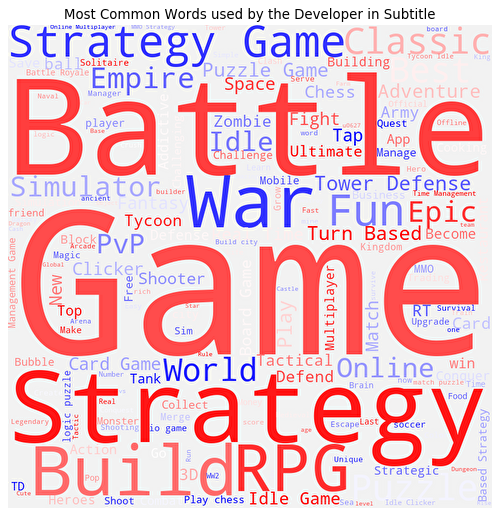

In [32]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(8,8),dpi=80)
stopwords = set(STOPWORDS)
wc = WordCloud(width=800, height=800, margin=0, background_color="#f2f2f2" , 
                stopwords = stopwords, colormap=plt.get_cmap('bwr') ,
                min_font_size = 10, max_font_size = 500).generate(' '.join(data['Subtitle'].dropna()))
plt.imshow(wc, interpolation='sinc')
plt.title("Most Common Words used by the Developer in Subtitle")
plt.axis("off")
plt.show()

### Most common words used by the Developer in Subtitle are Battle, Build, Strategy, War, RPG, Strategy, Game, Simulator<br>

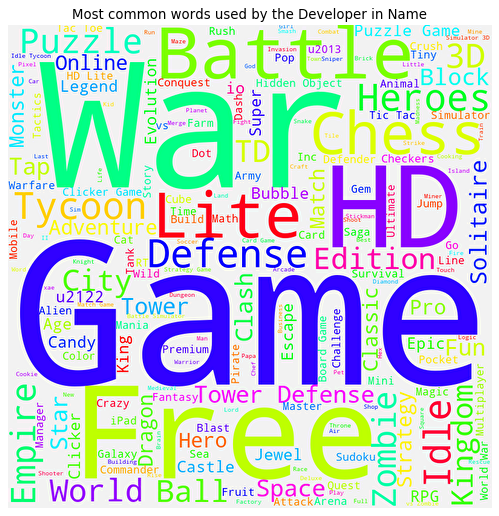

In [33]:
plt.figure(figsize=(8,8),dpi=80)
stopwords = set(STOPWORDS)
wc = WordCloud(width=800, height=800, margin=0, background_color="#f2f2f2" , 
                stopwords = stopwords, colormap=plt.get_cmap('hsv') ,
                min_font_size = 10, max_font_size = 500).generate(' '.join(data['Name'].dropna()))
plt.imshow(wc, interpolation='sinc')
plt.title("Most common words used by the Developer in Name")
plt.axis("off")
plt.show()

### Removing Words like Free , HD , Game , Lite from Names

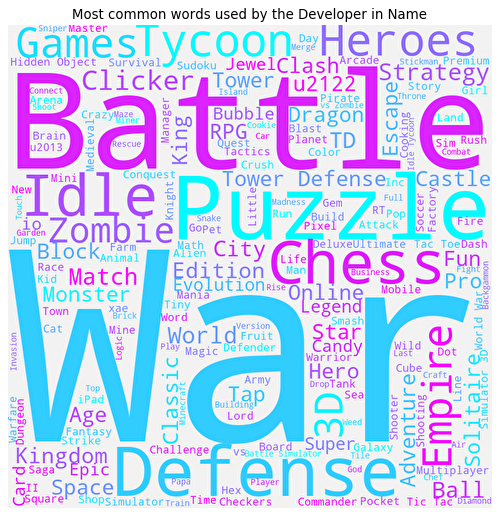

In [34]:
plt.figure(figsize=(8,8),dpi=80)
stopwords = set(STOPWORDS)
stopwords |= {"Free","HD","Game","Lite"}
wc = WordCloud(width=800, height=800, margin=0, background_color="#f2f2f2" ,colormap=plt.get_cmap('cool'),
                stopwords = stopwords, 
                min_font_size = 10, max_font_size = 500).generate(' '.join(data['Name'].dropna()))
plt.imshow(wc, interpolation='sinc')
plt.title("Most common words used by the Developer in Name")
plt.axis("off")
plt.show()

### Most Common Words used while naming app are War , Puzzle , Idle , Defense , Chess , Battle , Zombie , Heroes 
### Almost 65% data of Subtitle column is missing and remaining data is completely distinct.
### Thus removing the Subtitle column from the dataset.<br>

In [35]:
data.drop(['Subtitle'],axis=1,inplace=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7561 entries, 0 to 16993
Data columns (total 18 columns):
Name                            7561 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           7561 non-null float64
In-app Purchases                4634 non-null object
Developer                       7561 non-null object
Age Rating                      7561 non-null object
Languages                       7537 non-null object
Size                            7561 non-null float64
Primary Genre                   7561 non-null object
Genres                          7561 non-null object
Original Release Date           7561 non-null datetime64[ns]
Current Version Release Date    7561 non-null datetime64[ns]
Release_Year                    7561 non-null int64
Release_Month                   7561 non-null int64
Days_Since_Last_Updated         7561 non-null int64
Service_Period             

In [37]:
data['Languages'].value_counts()

EN                                                                                                                                                                                        5007
EN, ZH                                                                                                                                                                                     134
EN, ZH, ZH                                                                                                                                                                                 124
EN, DE                                                                                                                                                                                      69
CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH, TR                                                                                                                              64
EN, RU                                       

In [38]:
#Filling the missing values in Languages column using mode of the column (mode('Languages')=EN)
data['Languages'].fillna('EN',inplace=True)

In [39]:
data.isnull().sum()

Name                               0
Average User Rating                0
User Rating Count                  0
Price                              0
In-app Purchases                2927
Developer                          0
Age Rating                         0
Languages                          0
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
Release_Year                       0
Release_Month                      0
Days_Since_Last_Updated            0
Service_Period                     0
Curent_Version_Release_Year        0
dtype: int64

In [40]:
np.unique(data['Primary Genre'])

array(['Book', 'Business', 'Education', 'Entertainment', 'Finance',
       'Food & Drink', 'Games', 'Health & Fitness', 'Lifestyle',
       'Medical', 'Music', 'Navigation', 'News', 'Productivity',
       'Reference', 'Shopping', 'Social Networking', 'Sports', 'Stickers',
       'Travel', 'Utilities'], dtype=object)

In [41]:
data['Primary Genre'].value_counts()

Games                7291
Entertainment          92
Education              46
Utilities              44
Sports                 23
Reference              18
Productivity            8
Finance                 8
Book                    5
Lifestyle               4
Health & Fitness        3
Stickers                3
Social Networking       3
Music                   3
Medical                 2
Business                2
News                    2
Travel                  1
Food & Drink            1
Navigation              1
Shopping                1
Name: Primary Genre, dtype: int64

### Almost 96% data in Primary Genre column is Games, which makes it almost single valued column and inturn makes dataset biased.
#### Thus removing the Primary Genre column<br>

In [42]:
data.drop(['Primary Genre'],axis=1,inplace=True)

In [43]:
data.head()

Name  Average User Rating  User Rating Count  Price  \
0         Sudoku                  4.0             3553.0   2.99   
1        Reversi                  3.5              284.0   1.99   
2        Morocco                  3.0             8376.0   0.00   
3  Sudoku (Free)                  3.5           190394.0   0.00   
4   Senet Deluxe                  3.5               28.0   2.99   

  In-app Purchases                 Developer Age Rating  \
0              NaN  Mighty Mighty Good Games         4+   
1              NaN          Kiss The Machine         4+   
2              NaN               Bayou Games         4+   
3              NaN  Mighty Mighty Good Games         4+   
4              NaN           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

                              Genres Original Release Date  \
0            Games, Strategy, Puzzle            2008-07-11   
1             Games, Strategy, Board            2008-07-11   
2             Games, Board, Strategy            2008-07-11   
3            Games, Strategy, Puzzle            2008-07-23   
4  Games, Strategy, Board, Education            2008-07-18   

  Current Version Release Date  Release_Year  Release_Month  \
0                   2017-05-30          2008              7   
1                   2018-05-17          2008              7   
2                   2017-09-05          2008              7   
3                   2017-05-30          2008              7   
4                   2018-07-22          2008              7   

   Days_Since_Last_Updated  Service_Period  Curent_Version_Release_Year  
0                      879            4124                         2017  
1                      527            4124                         2018  
2                      781            4124                         2017  
3                      879            4112                         2017  
4                      461            4117                         2018

### Games with less than 200 user rating and days since last update date $<$ 6 month should be dropped to prevent biased ratings from the developer<br>

In [44]:
data.drop(data[(data['User Rating Count'] < 200) & (data['Days_Since_Last_Updated'] < 180)].index,axis=0,inplace=True)

In [45]:
data.shape

(6899, 17)

In [46]:
data['In-app Purchases'].value_counts()

0.99                                                                       370
1.99                                                                       238
2.99                                                                       191
0.99, 0.99                                                                  72
4.99                                                                        61
0.99, 0.99, 0.99                                                            36
1.99, 0.99                                                                  30
3.99                                                                        26
0.99, 1.99                                                                  18
1.99, 1.99                                                                  13
0.99, 4.99                                                                  13
2.99, 2.99                                                                  13
5.99                                                

In [47]:
data['In-app Purchases'].isnull().sum()

2698

### Drawing pair plot for further study<br>

C:\Users\manoj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\manoj\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


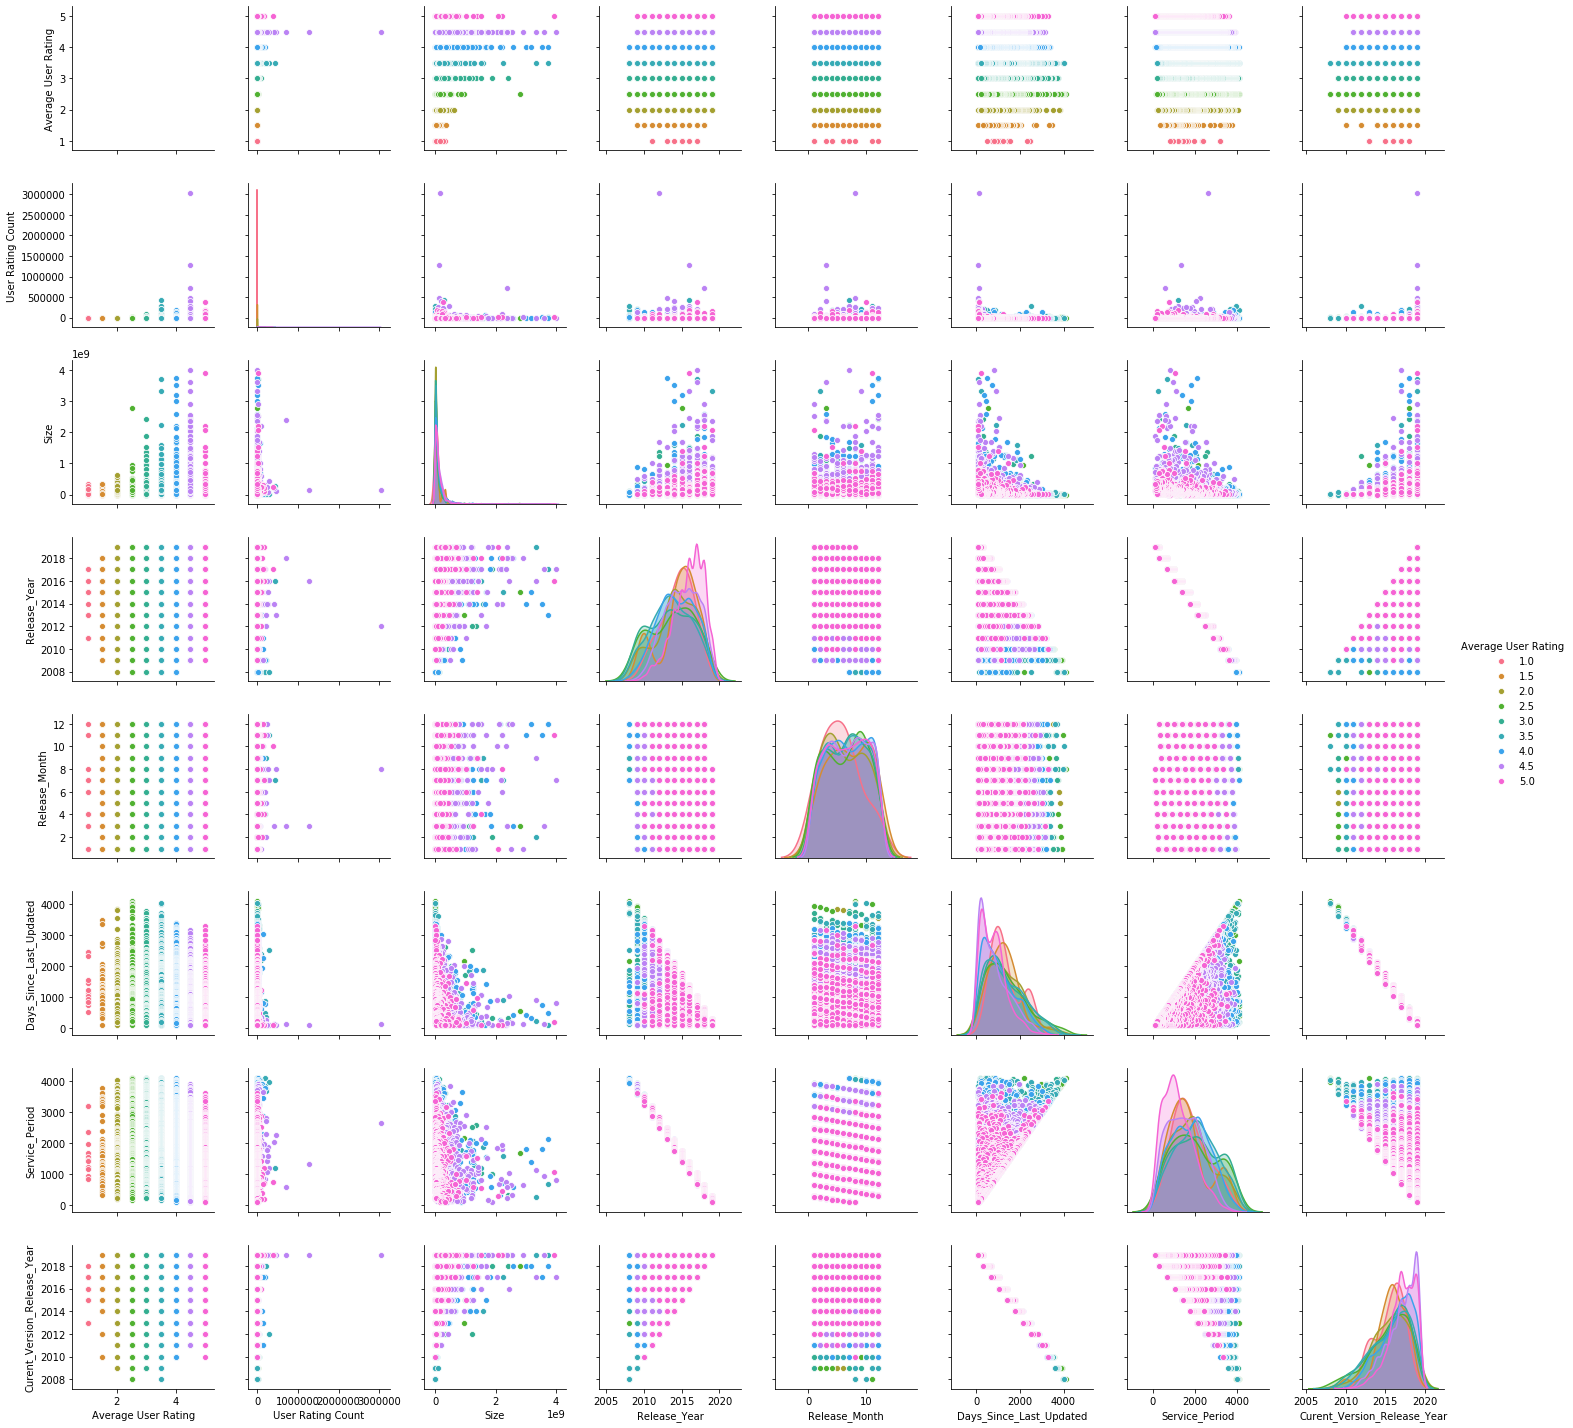

In [48]:
sns.pairplot(data=data.drop(['Price'],axis=1), hue='Average User Rating', palette="husl")

## Extracting Number of Languages supported from Languages column<br>

In [49]:
data['no_of_lang'] = data['Languages']

In [50]:
data['no_of_lang'] = data['no_of_lang'].str.replace(",","")

In [51]:
data['no_of_lang'] = data['no_of_lang'].str.replace(" ","")

In [52]:
data['no_of_lang'] = data['no_of_lang'].map(lambda x: len(x)//2)

In [53]:
data.dtypes

Name                                    object
Average User Rating                    float64
User Rating Count                      float64
Price                                  float64
In-app Purchases                        object
Developer                               object
Age Rating                              object
Languages                               object
Size                                   float64
Genres                                  object
Original Release Date           datetime64[ns]
Current Version Release Date    datetime64[ns]
Release_Year                             int64
Release_Month                            int64
Days_Since_Last_Updated                  int64
Service_Period                           int64
Curent_Version_Release_Year              int64
no_of_lang                               int64
dtype: object

In [54]:
data.head()

Name  Average User Rating  User Rating Count  Price  \
0         Sudoku                  4.0             3553.0   2.99   
1        Reversi                  3.5              284.0   1.99   
2        Morocco                  3.0             8376.0   0.00   
3  Sudoku (Free)                  3.5           190394.0   0.00   
4   Senet Deluxe                  3.5               28.0   2.99   

  In-app Purchases                 Developer Age Rating  \
0              NaN  Mighty Mighty Good Games         4+   
1              NaN          Kiss The Machine         4+   
2              NaN               Bayou Games         4+   
3              NaN  Mighty Mighty Good Games         4+   
4              NaN           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

                              Genres Original Release Date  \
0            Games, Strategy, Puzzle            2008-07-11   
1             Games, Strategy, Board            2008-07-11   
2             Games, Board, Strategy            2008-07-11   
3            Games, Strategy, Puzzle            2008-07-23   
4  Games, Strategy, Board, Education            2008-07-18   

  Current Version Release Date  Release_Year  Release_Month  \
0                   2017-05-30          2008              7   
1                   2018-05-17          2008              7   
2                   2017-09-05          2008              7   
3                   2017-05-30          2008              7   
4                   2018-07-22          2008              7   

   Days_Since_Last_Updated  Service_Period  Curent_Version_Release_Year  \
0                      879            4124                         2017   
1                      527            4124                         2018   
2                      781            4124                         2017   
3                      879            4112                         2017   
4                      461            4117                         2018   

   no_of_lang  
0          17  
1           1  
2           1  
3          17  
4          15

### Plotting Number of Languages against Average User Rating<br>

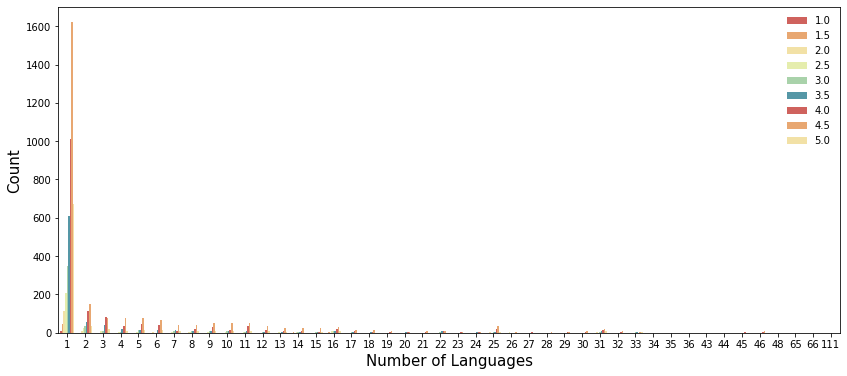

In [55]:
plt.figure(figsize=(14,6))
lang = sns.countplot(x='no_of_lang',hue='Average User Rating',data=data,palette=sns.color_palette("Spectral"))
lang.legend(loc='upper right', frameon=False)
plt.xlabel("Number of Languages",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

### Most of the apps support only one language EN(English)<br>

In [56]:
# Classifying into classes of languages
# 1-Apps supporting of <= 5 Languages
# 2-Apps supporting of > 5 and <=10 Languages
# 3-Apps supporting of > 10 and <=20 Languages
# 4-Apps supporting of > 20 and <= 30 Languages
# 5-Apps supporting of > 30 and <= 50 Languages
# 6-Apps supporting of > 50 Languages
def langclass(num):
    if(num <= 5):
        return 5
    elif(num <= 10):
        return 10
    elif(num <= 20):
        return 20
    elif(num <= 30):
        return 30
    elif(num <= 50):
        return 50
    else:
        return 100

In [57]:
data['no_of_lang'] = data['no_of_lang'].map(lambda x: langclass(x))

In [58]:
data.shape

(6899, 18)

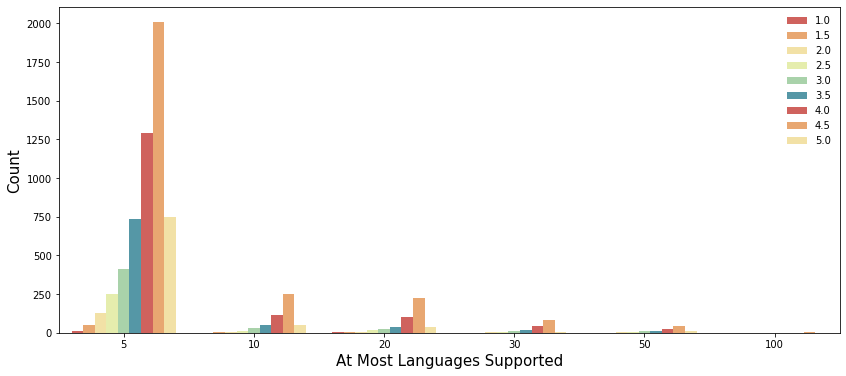

In [59]:
plt.figure(figsize=(14,6))
lang_c = sns.countplot(x='no_of_lang',hue='Average User Rating',data=data,palette=sns.color_palette('Spectral'))
lang_c.legend(loc='upper right', frameon=False)
plt.xlabel("At Most Languages Supported",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

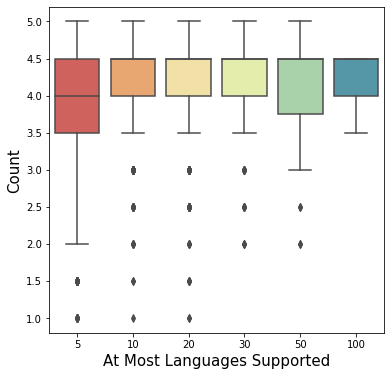

In [60]:
plt.figure(figsize=(6,6))
lang_cb = sns.boxplot(x='no_of_lang',y='Average User Rating',data=data, palette=sns.color_palette('Spectral'))
plt.xlabel("At Most Languages Supported",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

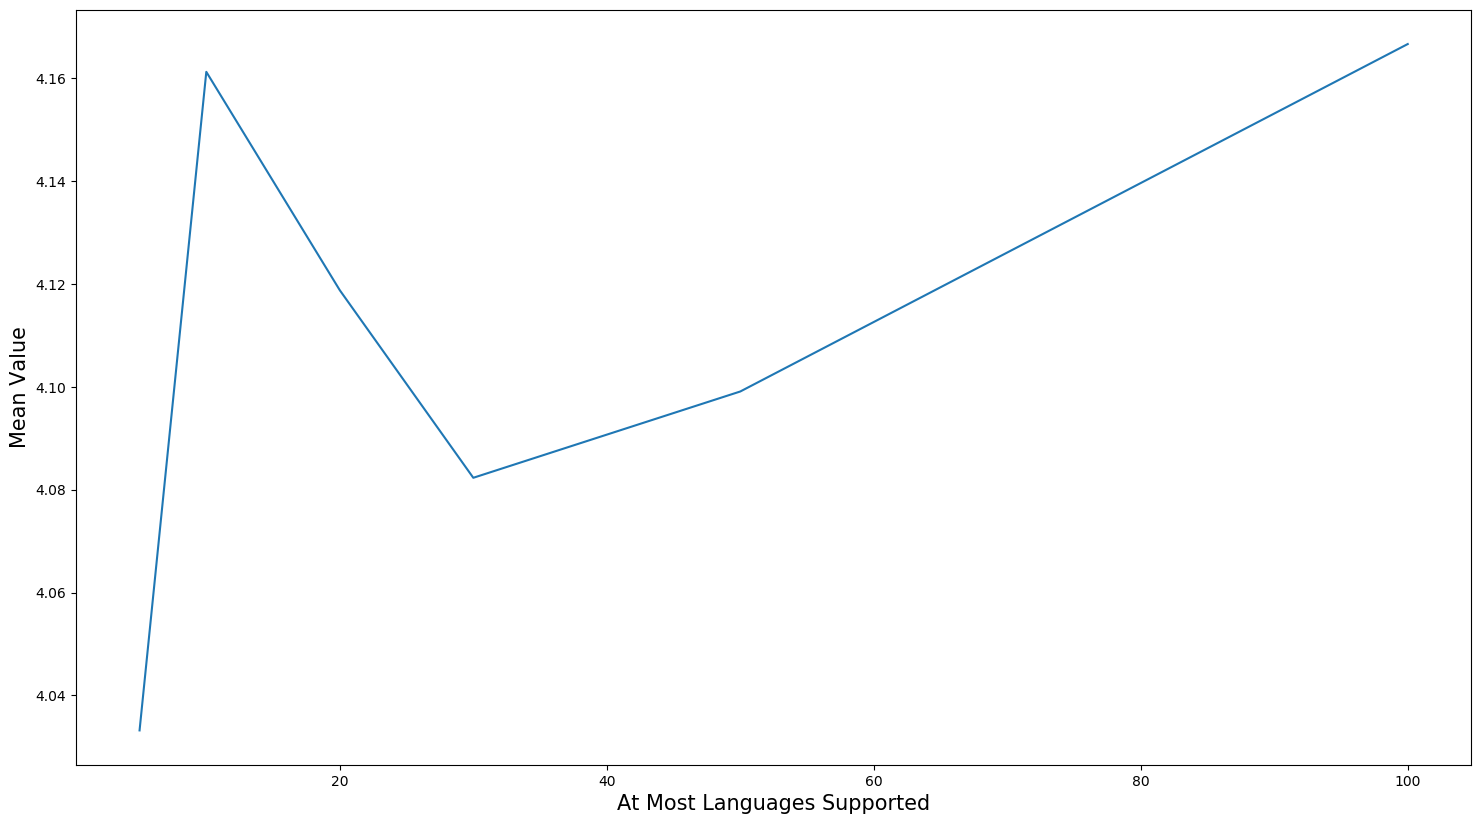

In [61]:
x=[5,10,20,30,50,100]
y = [data[data["no_of_lang"]==5]["Average User Rating"].mean(),
     data[data["no_of_lang"]==10]["Average User Rating"].mean(),
     data[data["no_of_lang"]==20]["Average User Rating"].mean(),
     data[data["no_of_lang"]==30]["Average User Rating"].mean(),
     data[data["no_of_lang"]==50]["Average User Rating"].mean(),
     data[data["no_of_lang"]==100]["Average User Rating"].mean()]

plt.figure(figsize=(18,10),dpi=100)
ax = sns.lineplot(x,y,palette="cool")
ax.set_ylabel("Mean Value",fontsize=15)
ax.set_xlabel("At Most Languages Supported",fontsize=15)
plt.show()

### It is clear that apps which support atmost 5 languages have equal chances of falling above 4.0 rating as well as below 4.0 rating(in between 3.5-4.5)
### Rest all other apps that support more than 5 languages show high User rating( $>$ 4.0)

## Understanding In-app Purchases<br>

In [62]:
data['Service_offered'] = data['In-app Purchases']

In [63]:
import math
def purch(x):
    if(x['Price'] == 0.0):
        if(type(x['In-app Purchases']) == type(1.0)):
            if(math.isnan(x['In-app Purchases'])):
                return "Free"
            else:
                return "Free+purchases"
        else:
            return "Free+purchases"
    else:
        if(type(x['In-app Purchases']) == type(1.0)):
            if(math.isnan(x['In-app Purchases'])):
                return "Paid"
            else:
                return "Paid+purchases"
        else:
            return "Paid+purchases"
            
data['Service_offered'] = data.apply(purch,axis=1)

In [64]:
data.head()

Name  Average User Rating  User Rating Count  Price  \
0         Sudoku                  4.0             3553.0   2.99   
1        Reversi                  3.5              284.0   1.99   
2        Morocco                  3.0             8376.0   0.00   
3  Sudoku (Free)                  3.5           190394.0   0.00   
4   Senet Deluxe                  3.5               28.0   2.99   

  In-app Purchases                 Developer Age Rating  \
0              NaN  Mighty Mighty Good Games         4+   
1              NaN          Kiss The Machine         4+   
2              NaN               Bayou Games         4+   
3              NaN  Mighty Mighty Good Games         4+   
4              NaN           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

                              Genres Original Release Date  \
0            Games, Strategy, Puzzle            2008-07-11   
1             Games, Strategy, Board            2008-07-11   
2             Games, Board, Strategy            2008-07-11   
3            Games, Strategy, Puzzle            2008-07-23   
4  Games, Strategy, Board, Education            2008-07-18   

  Current Version Release Date  Release_Year  Release_Month  \
0                   2017-05-30          2008              7   
1                   2018-05-17          2008              7   
2                   2017-09-05          2008              7   
3                   2017-05-30          2008              7   
4                   2018-07-22          2008              7   

   Days_Since_Last_Updated  Service_Period  Curent_Version_Release_Year  \
0                      879            4124                         2017   
1                      527            4124                         2018   
2                      781            4124                         2017   
3                      879            4112                         2017   
4                      461            4117                         2018   

   no_of_lang Service_offered  
0          20            Paid  
1           5            Paid  
2           5            Free  
3          20            Free  
4          20            Paid

### Distribution of data against different service the apps are offering<br>

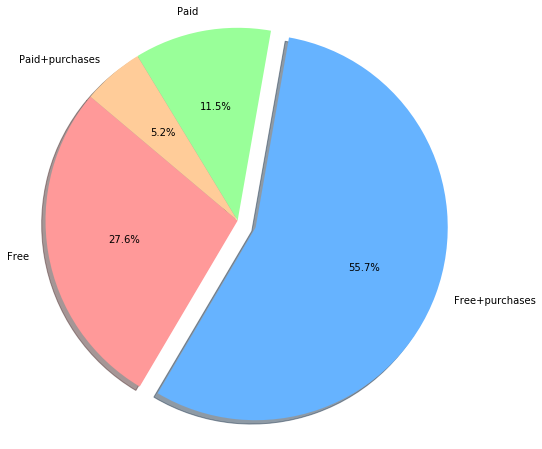

In [65]:
plt.figure(figsize=(8,8))
service_list = data['Service_offered'].tolist()
count_list = []
count_list.append(service_list.count("Free"))
count_list.append(service_list.count("Free+purchases"))
count_list.append(service_list.count("Paid"))
count_list.append(service_list.count("Paid+purchases"))
plt.pie(count_list, labels=["Free","Free+purchases","Paid","Paid+purchases"], explode=(0,0.1,0,0),
autopct='%1.1f%%', shadow=True, startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.axis('equal')
plt.show()

### Most of the apps are Free that avail In-app Purchases<br>

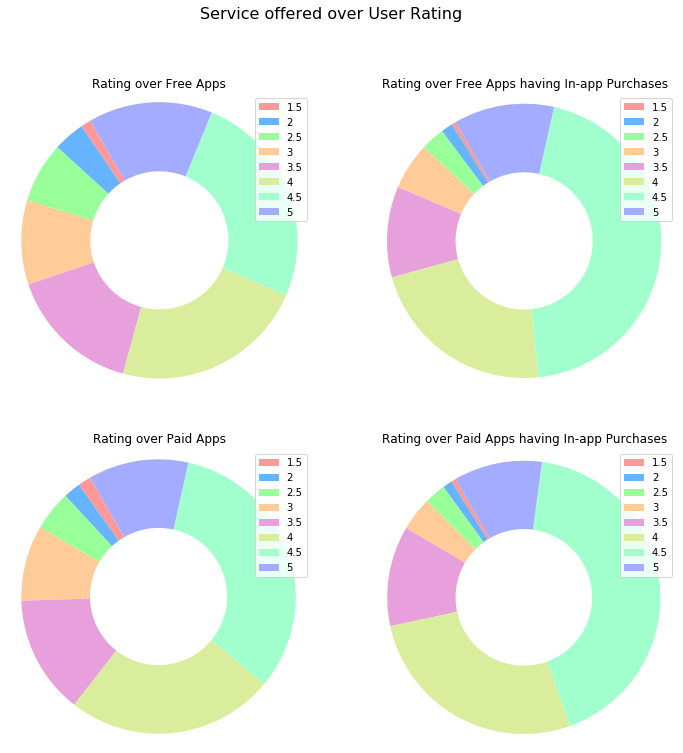

In [66]:
import matplotlib.gridspec as gridspec

plt.figure(2, figsize=(12,12))
the_grid = gridspec.GridSpec(2, 2)

df = data[data['Service_offered'] == "Free"]
service_list = df["Average User Rating"].tolist()
count_list = []
count_list.append(service_list.count(1.5))
count_list.append(service_list.count(2.0))
count_list.append(service_list.count(2.5))
count_list.append(service_list.count(3.0))
count_list.append(service_list.count(3.5))
count_list.append(service_list.count(4.0))
count_list.append(service_list.count(4.5))
count_list.append(service_list.count(5.0))

labels=[1.5, 2 , 2.5, 3 , 3.5, 4 , 4.5, 5 ]

plt.subplot(the_grid[0, 0],  title='Rating over Free Apps')
plt.pie(count_list,startangle=120 ,
             colors=['#ff9999','#66b3ff','#99ff99','#ffcc99',"#e8a0dd","#daed9d","#a1ffcd","#a3acff"],
                wedgeprops=dict(width=0.5, edgecolor='w',linewidth=0))
plt.axis('equal')
plt.legend(labels,loc="best")

#-------------------------------------------------------------------------------------------------------------

df = data[data['Service_offered'] == "Free+purchases"]
service_list = df["Average User Rating"].tolist()
count_list = []
count_list.append(service_list.count(1.5))
count_list.append(service_list.count(2.0))
count_list.append(service_list.count(2.5))
count_list.append(service_list.count(3.0))
count_list.append(service_list.count(3.5))
count_list.append(service_list.count(4.0))
count_list.append(service_list.count(4.5))
count_list.append(service_list.count(5.0))

plt.subplot(the_grid[0, 1],  title='Rating over Free Apps having In-app Purchases')
plt.pie(count_list,startangle=120 ,
             colors=['#ff9999','#66b3ff','#99ff99','#ffcc99',"#e8a0dd","#daed9d","#a1ffcd","#a3acff"],
                wedgeprops=dict(width=0.5, edgecolor='w',linewidth=0))
plt.axis('equal')
plt.legend(labels,loc="best")

#-------------------------------------------------------------------------------------------------------------

df = data[data['Service_offered'] == "Paid"]
service_list = df["Average User Rating"].tolist()
count_list = []
count_list.append(service_list.count(1.5))
count_list.append(service_list.count(2.0))
count_list.append(service_list.count(2.5))
count_list.append(service_list.count(3.0))
count_list.append(service_list.count(3.5))
count_list.append(service_list.count(4.0))
count_list.append(service_list.count(4.5))
count_list.append(service_list.count(5.0))

plt.subplot(the_grid[1, 0],  title='Rating over Paid Apps')
plt.pie(count_list,startangle=120 ,
             colors=['#ff9999','#66b3ff','#99ff99','#ffcc99',"#e8a0dd","#daed9d","#a1ffcd","#a3acff"],
                wedgeprops=dict(width=0.5, edgecolor='w',linewidth=0))
plt.axis('equal')
plt.legend(labels,loc="best")

#-------------------------------------------------------------------------------------------------------------

df = data[data['Service_offered'] == "Paid+purchases"]
service_list = df["Average User Rating"].tolist()
count_list = []
count_list.append(service_list.count(1.5))
count_list.append(service_list.count(2.0))
count_list.append(service_list.count(2.5))
count_list.append(service_list.count(3.0))
count_list.append(service_list.count(3.5))
count_list.append(service_list.count(4.0))
count_list.append(service_list.count(4.5))
count_list.append(service_list.count(5.0))

plt.subplot(the_grid[1, 1],  title='Rating over Paid Apps having In-app Purchases')
plt.pie(count_list,startangle=120 ,
             colors=['#ff9999','#66b3ff','#99ff99','#ffcc99',"#e8a0dd","#daed9d","#a1ffcd","#a3acff"],
                wedgeprops=dict(width=0.5, edgecolor='w',linewidth=0))
plt.axis('equal')
plt.legend(labels,loc="best")

plt.suptitle('Service offered over User Rating', fontsize=16)
plt.show()

### All Free Apps , Paid Apps , Paid Apps with In-app Purchases and Free Apps with In-app Purchases show high User Rating
### So Apps falling under any category show greater chance of getting high User Rating
### Most of the apps are Free and avail In-app Purchases , therefore the ratio of 'rating of Free+In-app Purchases'( $>$ 4.0) to 'rating of the remaining data'( $>$ 4.0) is high(3:2)<br>

In [67]:
data['In-app Purchases'] = data['In-app Purchases'].fillna(0.0)

In [68]:
data['In-app Purchases'] = data['In-app Purchases'].map(lambda x: str(x).replace(" ",""))

### Featuring Sum of In-app Purchases and Number of In-app Purchases <br>

In [69]:
data['Sum_of_Purchases'] = data['In-app Purchases']

In [70]:
data['Sum_of_Purchases'] = data['In-app Purchases']

In [71]:
def sum_of_purchases(x):
    if(type(x) == type("hello")):
        sump = 0.0
        sump_list = x.split(",")
        for i in sump_list:
            sump = sump + float(i)
        return sump

data['Sum_of_Purchases'] = data['Sum_of_Purchases'].map(lambda x: sum_of_purchases(x))

In [72]:
data['No_of_Purchases'] = data['In-app Purchases']

In [73]:
def no_of_purchases(x):
    if(type(x) == type("hello")):
        sump_list = x.split(",")
        if(len(sump_list) > 1):
            return len(sump_list)
        else:
            if(float(sump_list[0])==0.0):
                return 0
            else:
                return 1

data['No_of_Purchases'] = data['In-app Purchases'].map(lambda x: no_of_purchases(x))

In [74]:
data.head()

Name  Average User Rating  User Rating Count  Price  \
0         Sudoku                  4.0             3553.0   2.99   
1        Reversi                  3.5              284.0   1.99   
2        Morocco                  3.0             8376.0   0.00   
3  Sudoku (Free)                  3.5           190394.0   0.00   
4   Senet Deluxe                  3.5               28.0   2.99   

  In-app Purchases                 Developer Age Rating  \
0              0.0  Mighty Mighty Good Games         4+   
1              0.0          Kiss The Machine         4+   
2              0.0               Bayou Games         4+   
3              0.0  Mighty Mighty Good Games         4+   
4              0.0           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

                              Genres  ... Current Version Release Date  \
0            Games, Strategy, Puzzle  ...                   2017-05-30   
1             Games, Strategy, Board  ...                   2018-05-17   
2             Games, Board, Strategy  ...                   2017-09-05   
3            Games, Strategy, Puzzle  ...                   2017-05-30   
4  Games, Strategy, Board, Education  ...                   2018-07-22   

  Release_Year  Release_Month  Days_Since_Last_Updated  Service_Period  \
0         2008              7                      879            4124   
1         2008              7                      527            4124   
2         2008              7                      781            4124   
3         2008              7                      879            4112   
4         2008              7                      461            4117   

   Curent_Version_Release_Year  no_of_lang  Service_offered Sum_of_Purchases  \
0                         2017          20             Paid              0.0   
1                         2018           5             Paid              0.0   
2                         2017           5             Free              0.0   
3                         2017          20             Free              0.0   
4                         2018          20             Paid              0.0   

   No_of_Purchases  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 21 columns]

### Correlation between different Features<br>

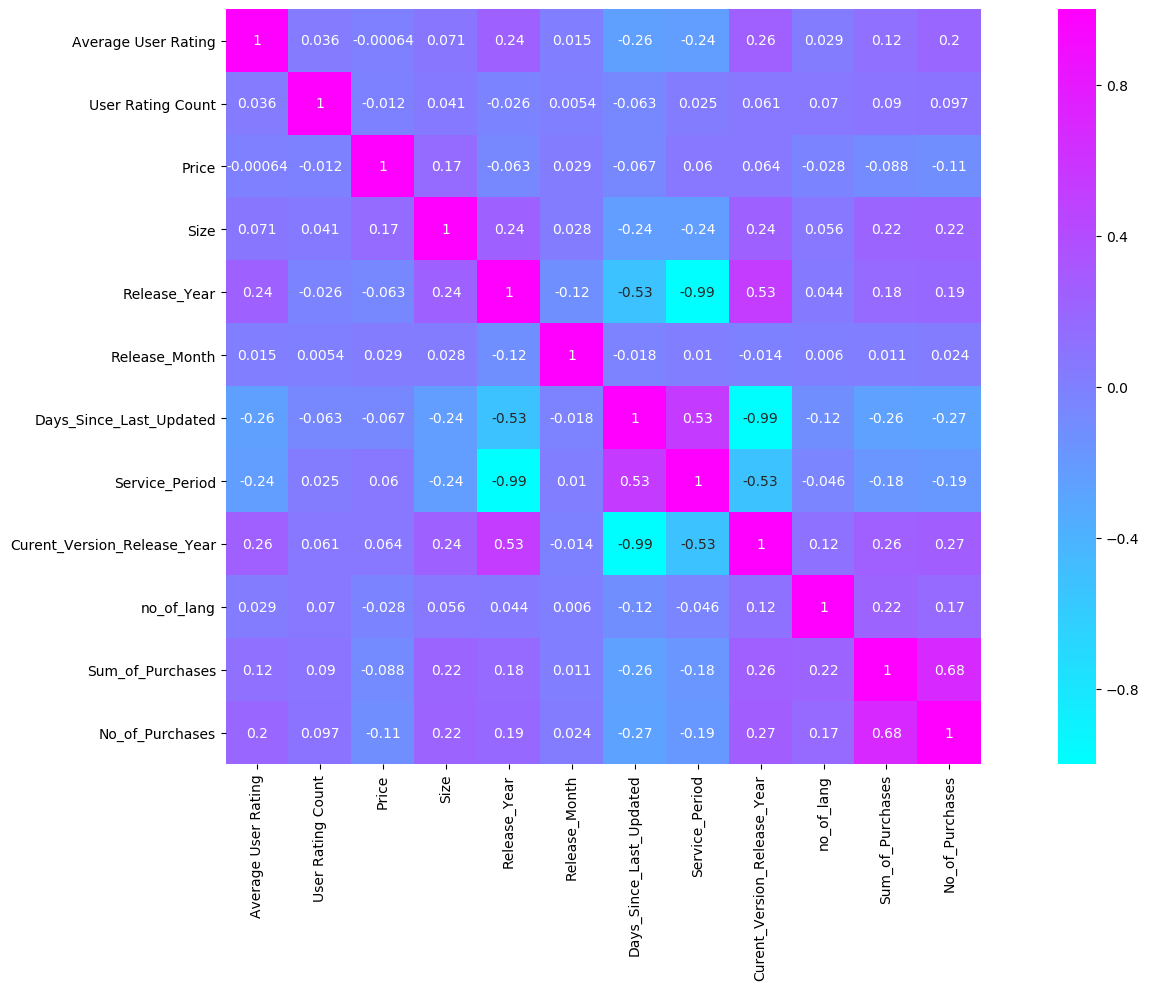

In [75]:
plt.figure(figsize = (20,10),dpi=100)
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0,
            square=True, annot = True, cmap = 'cool')
plt.show()

### Sum of Purchases shows slight positive correlation with User Rating<br>

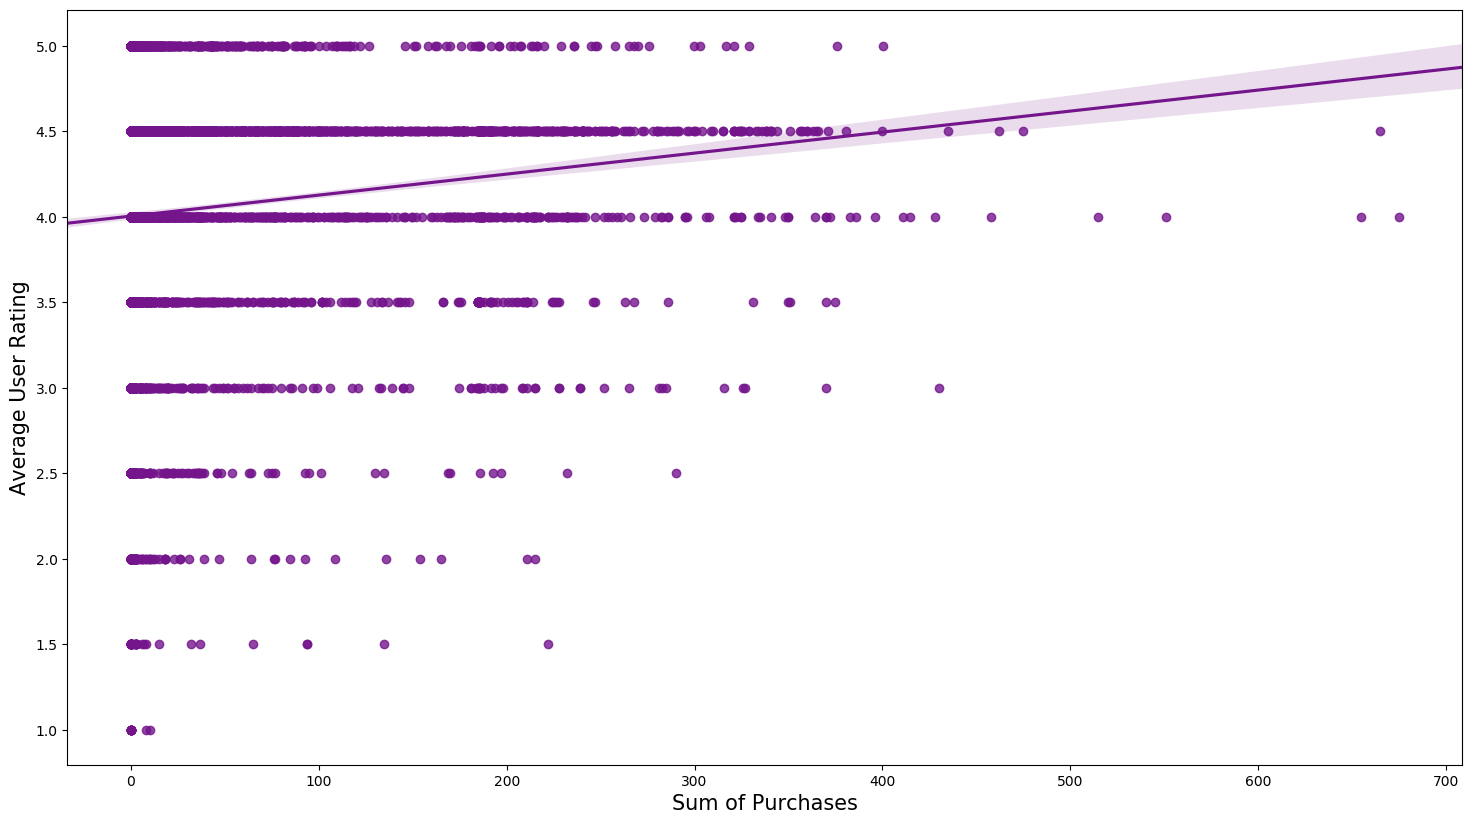

In [76]:
plt.figure(figsize=(18,10),dpi=100)
ax = sns.regplot(data=data, x='Sum_of_Purchases', y='Average User Rating', color = '#74158c')
ax.set_ylabel('Average User Rating', fontsize = 15)
ax.set_xlabel('Sum of Purchases', fontsize = 15)
plt.show()

### Also Number of Purchases show positive correlation with User Rating<br>

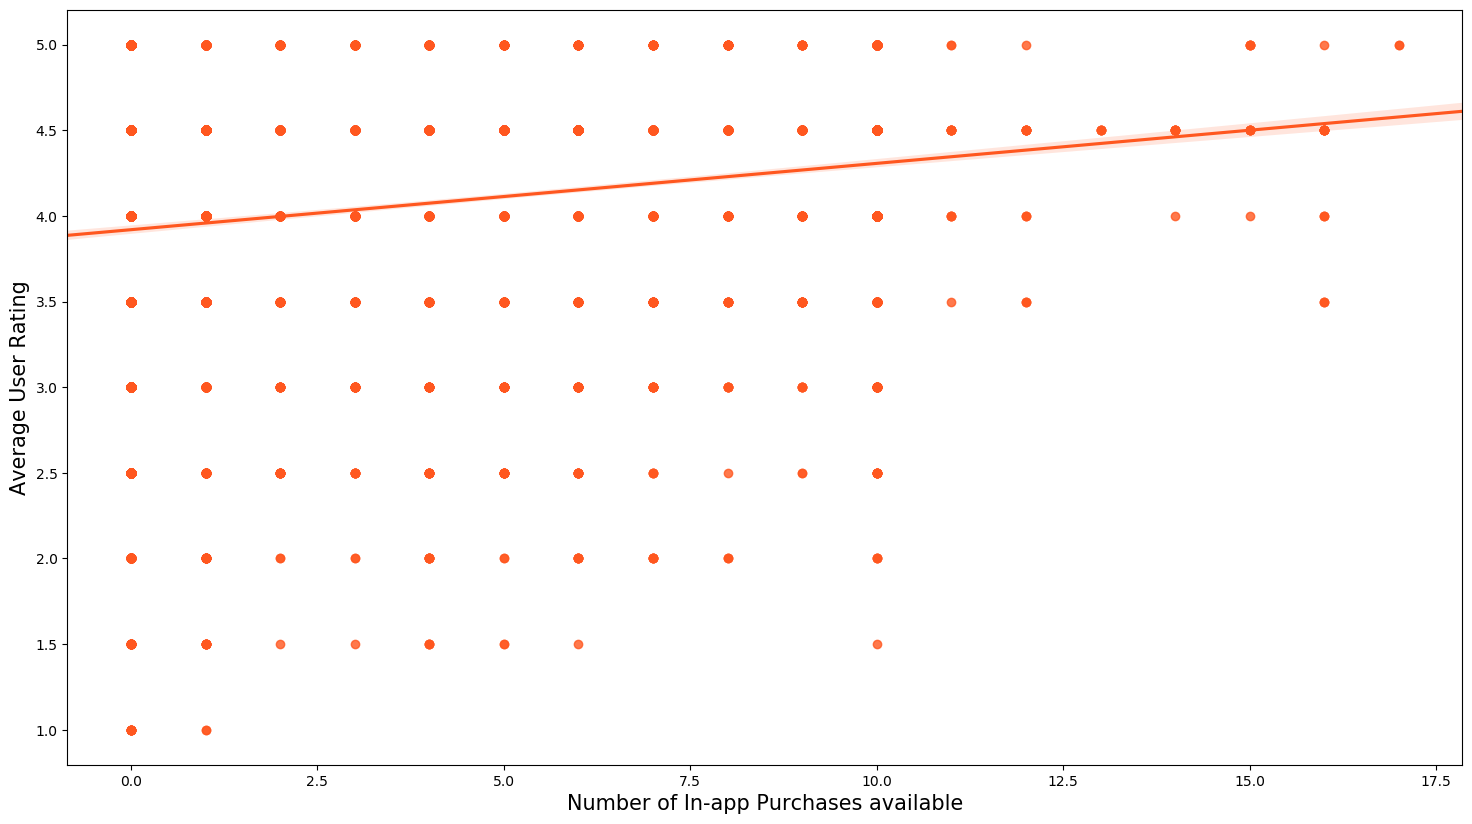

In [77]:
plt.figure(figsize=(18,10),dpi=100)
ax = sns.regplot(data=data, x='No_of_Purchases', y='Average User Rating', color = '#ff571f')
ax.set_ylabel('Average User Rating', fontsize = 15)
ax.set_xlabel('Number of In-app Purchases available', fontsize = 15)
plt.show()

## Age Rating Factor

### Data distribution over Age Rating<br>

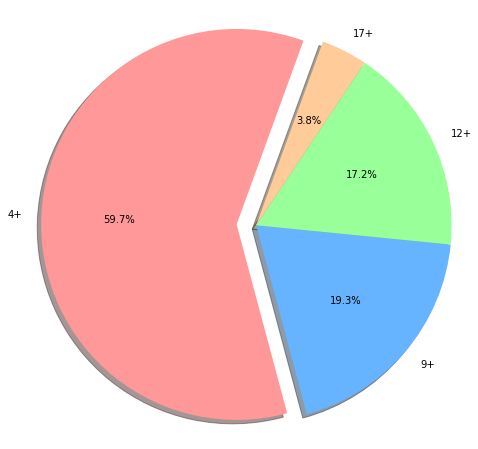

In [78]:
plt.figure(figsize=(8,8))
age_list = data['Age Rating'].tolist()
count_list = []
count_list.append(age_list.count("4+"))
count_list.append(age_list.count("9+"))
count_list.append(age_list.count("12+"))
count_list.append(age_list.count("17+"))
plt.pie(count_list, labels=["4+","9+","12+","17+"], explode=(0.1,0,0,0),
autopct='%1.1f%%', shadow=True, startangle=70, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.axis('equal')
plt.show()

### Most of the Apps are rated 4+<br>

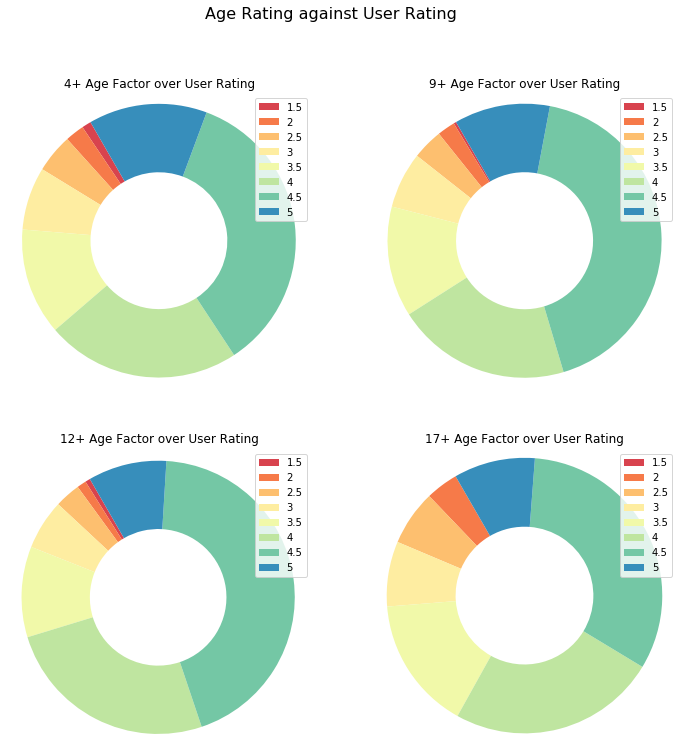

In [79]:
from matplotlib import cm
plt.figure(2,figsize=(12,12))
the_grid = gridspec.GridSpec(2, 2)

df = data[data['Age Rating'] == "4+"]
age_list = df["Average User Rating"].tolist()
count_list = []
count_list.append(age_list.count(1.5))
count_list.append(age_list.count(2.0))
count_list.append(age_list.count(2.5))
count_list.append(age_list.count(3.0))
count_list.append(age_list.count(3.5))
count_list.append(age_list.count(4.0))
count_list.append(age_list.count(4.5))
count_list.append(age_list.count(5.0))

labels=[1.5, 2 , 2.5, 3 , 3.5, 4 , 4.5, 5 ]

plt.subplot(the_grid[0, 0],  title='4+ Age Factor over User Rating')
plt.pie(count_list,startangle=120 ,
             colors=sns.color_palette('Spectral',8),     
                wedgeprops=dict(width=0.5, edgecolor='w',linewidth=0))
plt.axis('equal')
plt.legend(labels,loc="best")

#-------------------------------------------------------------------------------------------------------------

df = data[data['Age Rating'] == "9+"]
age_list = df["Average User Rating"].tolist()
count_list = []
count_list.append(age_list.count(1.5))
count_list.append(age_list.count(2.0))
count_list.append(age_list.count(2.5))
count_list.append(age_list.count(3.0))
count_list.append(age_list.count(3.5))
count_list.append(age_list.count(4.0))
count_list.append(age_list.count(4.5))
count_list.append(age_list.count(5.0))

labels=[1.5, 2 , 2.5, 3 , 3.5, 4 , 4.5, 5 ]

plt.subplot(the_grid[0, 1],  title='9+ Age Factor over User Rating')
plt.pie(count_list,startangle=120 ,
             colors=sns.color_palette('Spectral',8),
                wedgeprops=dict(width=0.5, edgecolor='w',linewidth=0))
plt.axis('equal')
plt.legend(labels,loc="best")

#-------------------------------------------------------------------------------------------------------------

df = data[data['Age Rating'] == "12+"]
age_list = df["Average User Rating"].tolist()
count_list = []
count_list.append(age_list.count(1.5))
count_list.append(age_list.count(2.0))
count_list.append(age_list.count(2.5))
count_list.append(age_list.count(3.0))
count_list.append(age_list.count(3.5))
count_list.append(age_list.count(4.0))
count_list.append(age_list.count(4.5))
count_list.append(age_list.count(5.0))

labels=[1.5, 2 , 2.5, 3 , 3.5, 4 , 4.5, 5 ]

plt.subplot(the_grid[1, 0],  title='12+ Age Factor over User Rating')
plt.pie(count_list,startangle=120 ,
             colors=sns.color_palette('Spectral',8),
                wedgeprops=dict(width=0.5, edgecolor='w',linewidth=0))
plt.axis('equal')
plt.legend(labels,loc="best")

#-------------------------------------------------------------------------------------------------------------

df = data[data['Age Rating'] == "17+"]
age_list = df["Average User Rating"].tolist()
count_list = []
count_list.append(age_list.count(1.5))
count_list.append(age_list.count(2.0))
count_list.append(age_list.count(2.5))
count_list.append(age_list.count(3.0))
count_list.append(age_list.count(3.5))
count_list.append(age_list.count(4.0))
count_list.append(age_list.count(4.5))
count_list.append(age_list.count(5.0))

labels=[1.5, 2 , 2.5, 3 , 3.5, 4 , 4.5, 5 ]

plt.subplot(the_grid[1, 1],  title='17+ Age Factor over User Rating')
plt.pie(count_list,startangle=120 ,
             colors=sns.color_palette('Spectral',8),
                wedgeprops=dict(width=0.5, edgecolor='w',linewidth=0))
plt.axis('equal')
plt.legend(labels,loc="best")

plt.suptitle('Age Rating against User Rating', fontsize=16)
plt.show()

### In every age group, more number of apps are having high user rating( $>$ 4.0)
### Most of the apps fall in 4+ age rating , therefore the ratio of 'apps rating of 4+'( $>$ 4.0) to 'apps rating of the remaining data'( $>$ 4.0) is high(3:2)<br>

## Game Size Analysis

### Size of the apps show some positive correlation with User Rating<br>

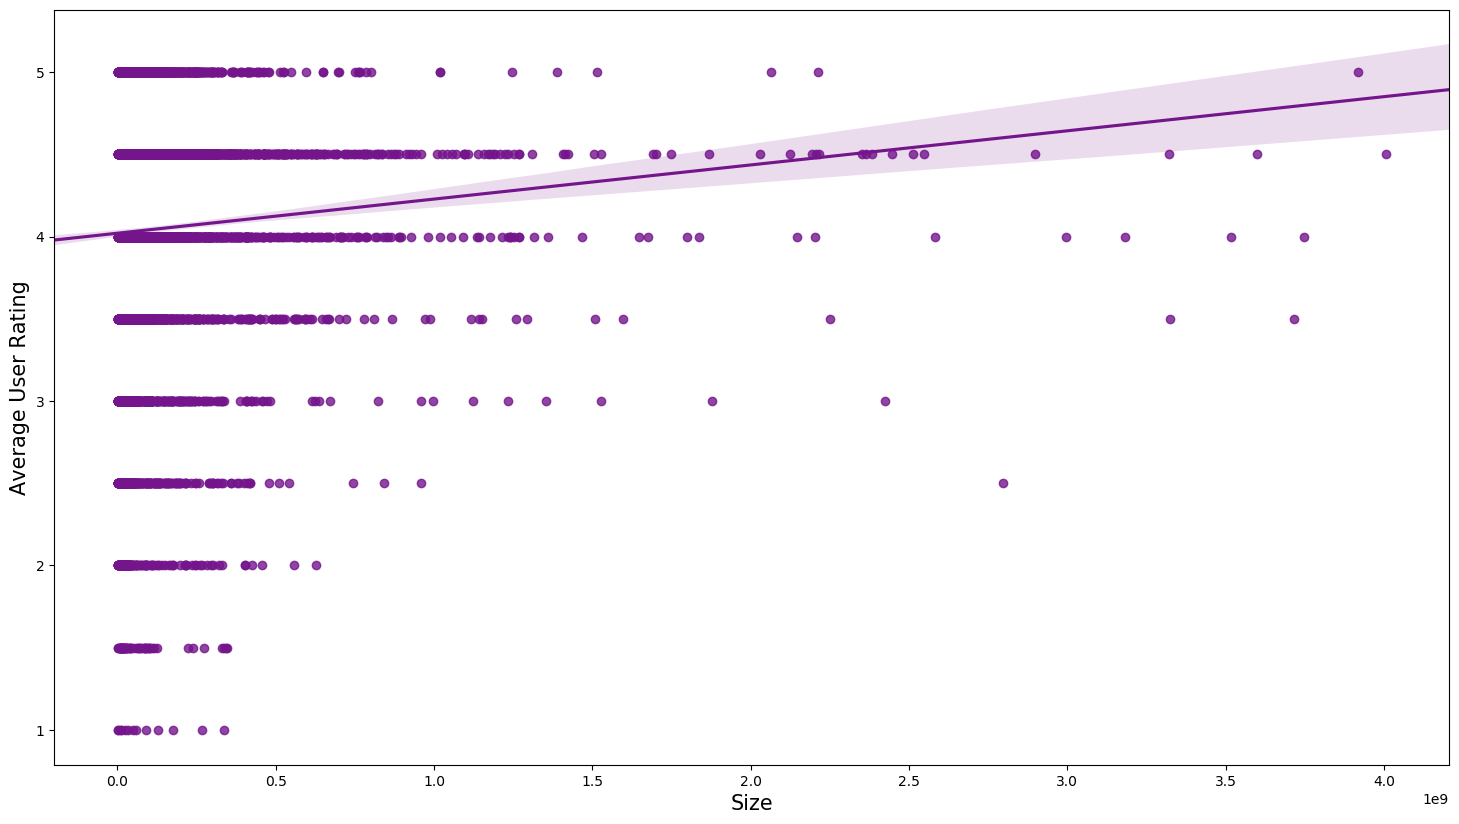

In [80]:
plt.figure(figsize=(18,10),dpi=100)
ax = sns.regplot(data=data, x='Size', y='Average User Rating', color = '#74158c')
ax.set_ylabel('Average User Rating', fontsize = 15)
ax.set_xlabel('Size', fontsize = 15)
plt.show()

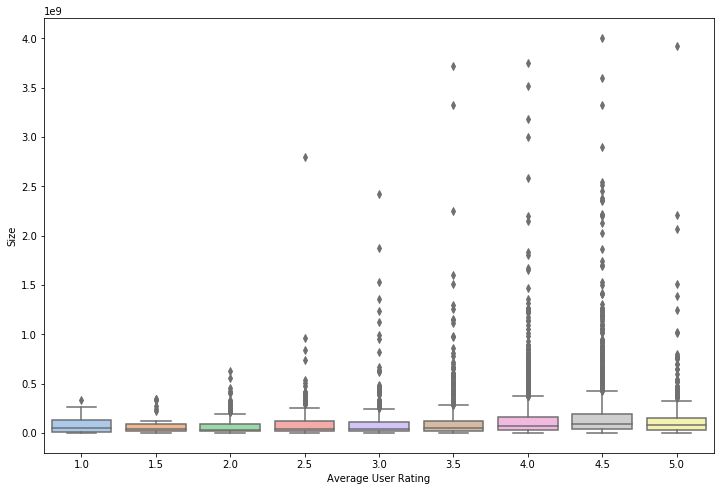

In [81]:
plt.figure(figsize=(12,8))
siz = sns.boxplot(data=data,y="Size",x="Average User Rating",palette=sns.color_palette("pastel"))
plt.show()

### Apps having size greater than 2500 MB are mostly rated $>$ 4.0

### Size of 85% apps lie between 0-2500 MegaByte<br> 

<Figure size 1296x720 with 0 Axes>

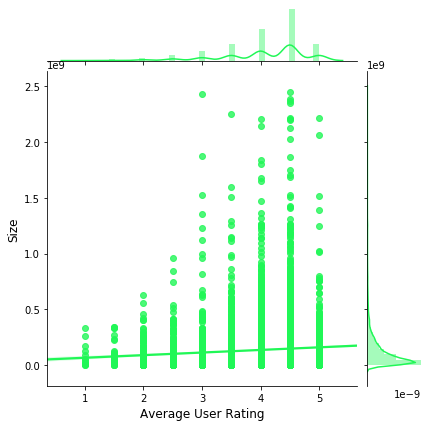

In [82]:
plt.figure(figsize=(18,10))
siz = sns.jointplot(data=data[data['Size'] < 2500000000.0], kind="reg" ,y="Size",x="Average User Rating",color="#20f756")
plt.xlabel("Average User Rating",fontsize=12)
plt.ylabel("Size",fontsize=12)
plt.show()

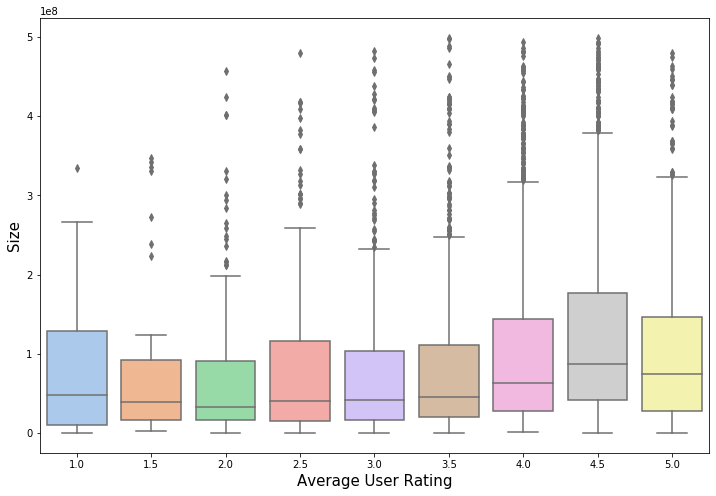

In [83]:
plt.figure(figsize=(12,8))
siz = sns.boxplot(data=data[data['Size'] < 500000000.0],y="Size",x="Average User Rating",palette=sns.color_palette("pastel"))
plt.xlabel("Average User Rating",fontsize=15)
plt.ylabel("Size",fontsize=15)
plt.show()

In [84]:
data['Size_class'] = data['Size']
def size_class(x):
    if(x <= 500000000.0):
        return 1
    elif(x <= 1000000000.0):
        return 2
    elif(x <= 1500000000.0):
        return 3
    elif(x <= 2000000000.0):
        return 4
    elif(x <= 2500000000.0):
        return 5
    else:
        return 6
    
data['Size_class'] = data['Size_class'].map(lambda x: size_class(x))

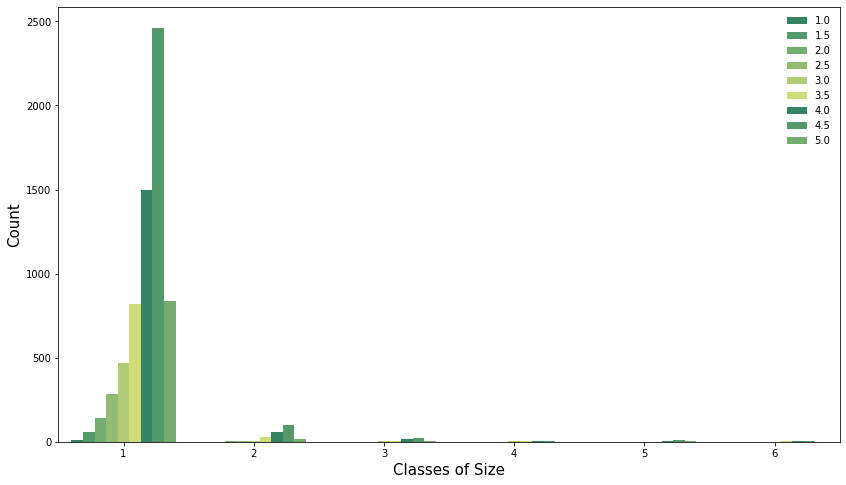

In [85]:
plt.figure(figsize=(14,8))
sns.countplot(x="Size_class",hue="Average User Rating",data=data,palette=sns.color_palette('summer'))
plt.xlabel("Classes of Size",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.legend(loc="upper right",frameon=False)
plt.show()

### Apps with less size 0-500 MegaByte have high probability(0.7) of having User Rating $>$ 4.0<br>

In [86]:
data['Size_class'] = data['Size']
def size_class(x):
    if(x <= 250000000.0):
        return 1
    elif(x <= 350000000.0):
        return 2
    elif(x <= 500000000.0):
        return 3
    elif(x <= 1000000000.0):
        return 4
    elif(x <= 1500000000.0):
        return 5
    elif(x <= 2000000000.0):
        return 6
    elif(x <= 2500000000.0):
        return 7
    else:
        return 8
    
data['Size_class'] = data['Size_class'].map(lambda x: size_class(x))

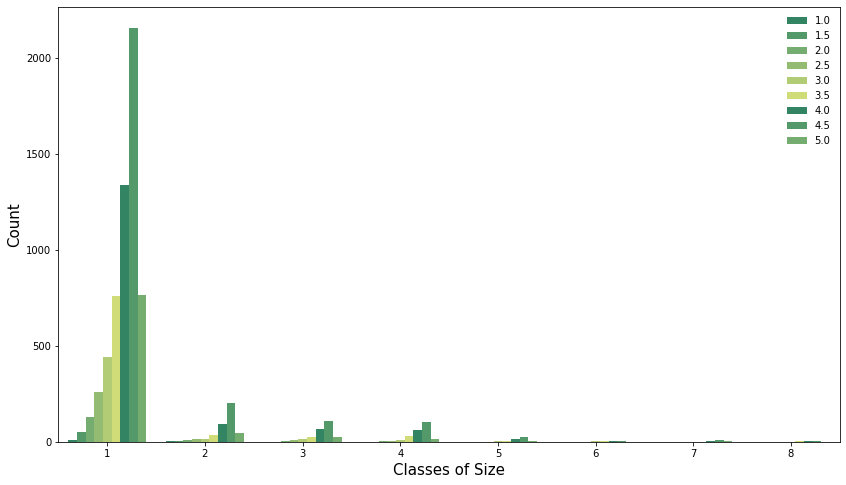

In [87]:
plt.figure(figsize=(14,8))
sns.countplot(x="Size_class",hue="Average User Rating",data=data,palette=sns.color_palette('summer'))
plt.xlabel("Classes of Size",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.legend(loc="upper right",frameon=False)
plt.show()

### In specific apps with less size 0-250 MegaByte have high probability(0.6) of having User Rating $>$ 4.0<br>

## Release date/ Update date factor<br>

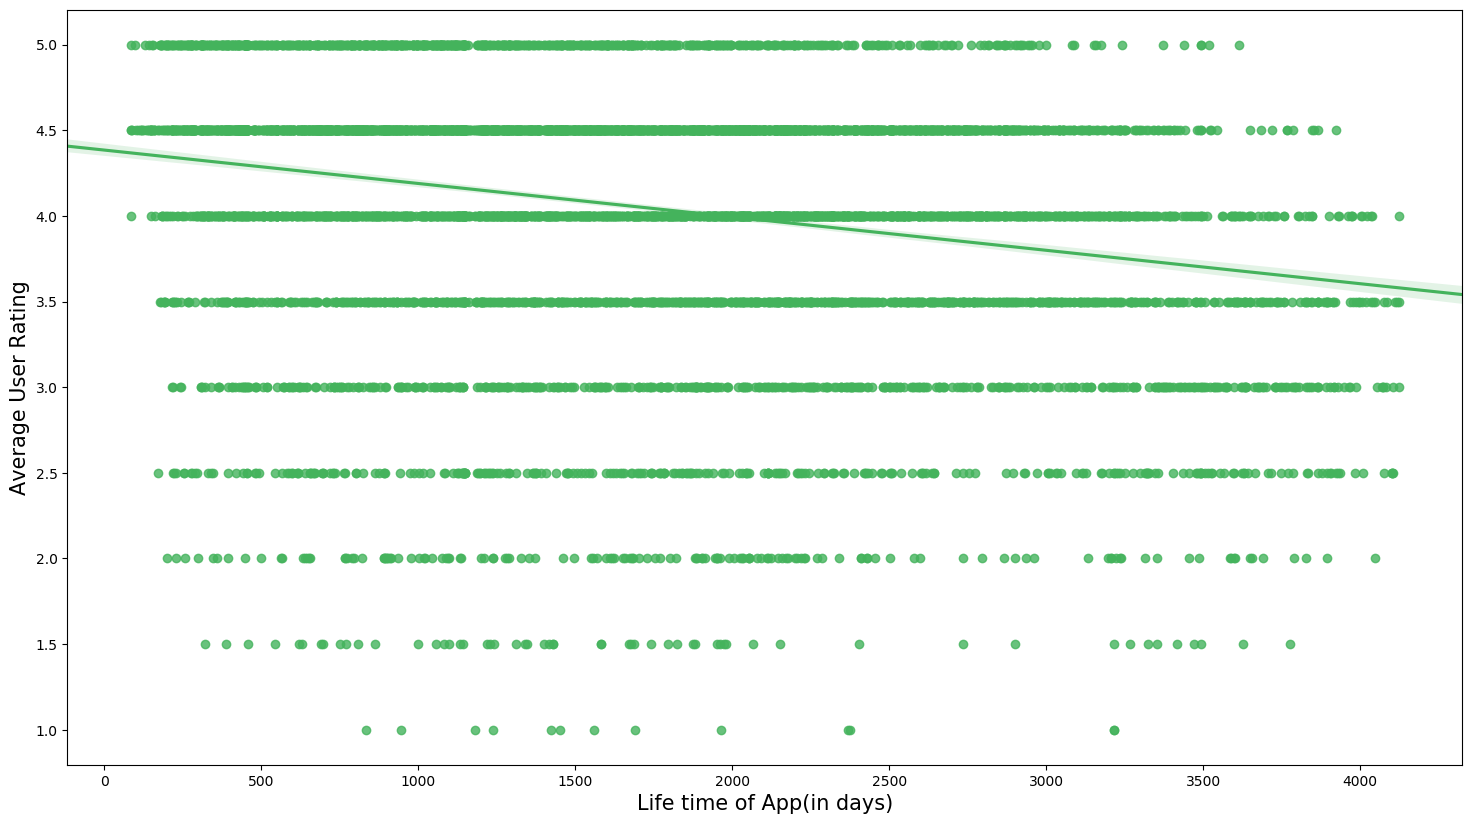

In [88]:
plt.figure(figsize=(18,10),dpi=100)
ax = sns.regplot(data=data, x='Service_Period', y='Average User Rating', color = '#44b35c')
ax.set_ylabel('Average User Rating', fontsize = 15)
ax.set_xlabel('Life time of App(in days)', fontsize = 15)
plt.show()

### Rating of the apps reduce over time<br>

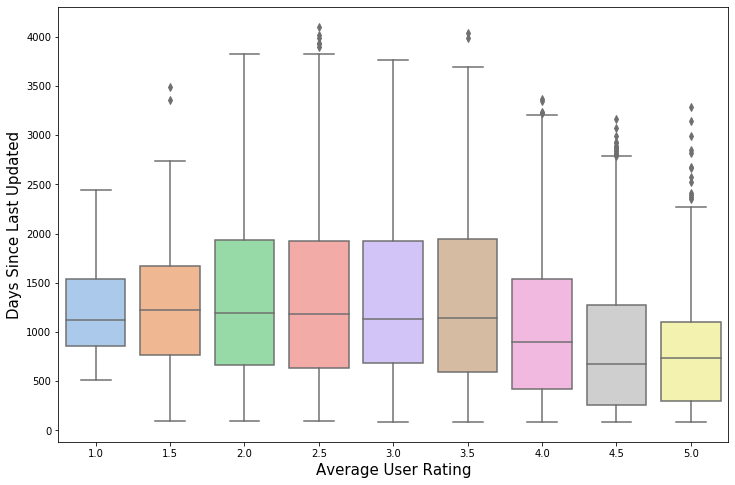

In [89]:
plt.figure(figsize=(12,8))
siz = sns.boxplot(data=data,y="Days_Since_Last_Updated",x="Average User Rating",palette=sns.color_palette("pastel"))
plt.xlabel('Average User Rating', fontsize = 15)
plt.ylabel('Days Since Last Updated', fontsize = 15)
plt.show()

### Apps which have frequent updates (in less time span) show high ratings<br>

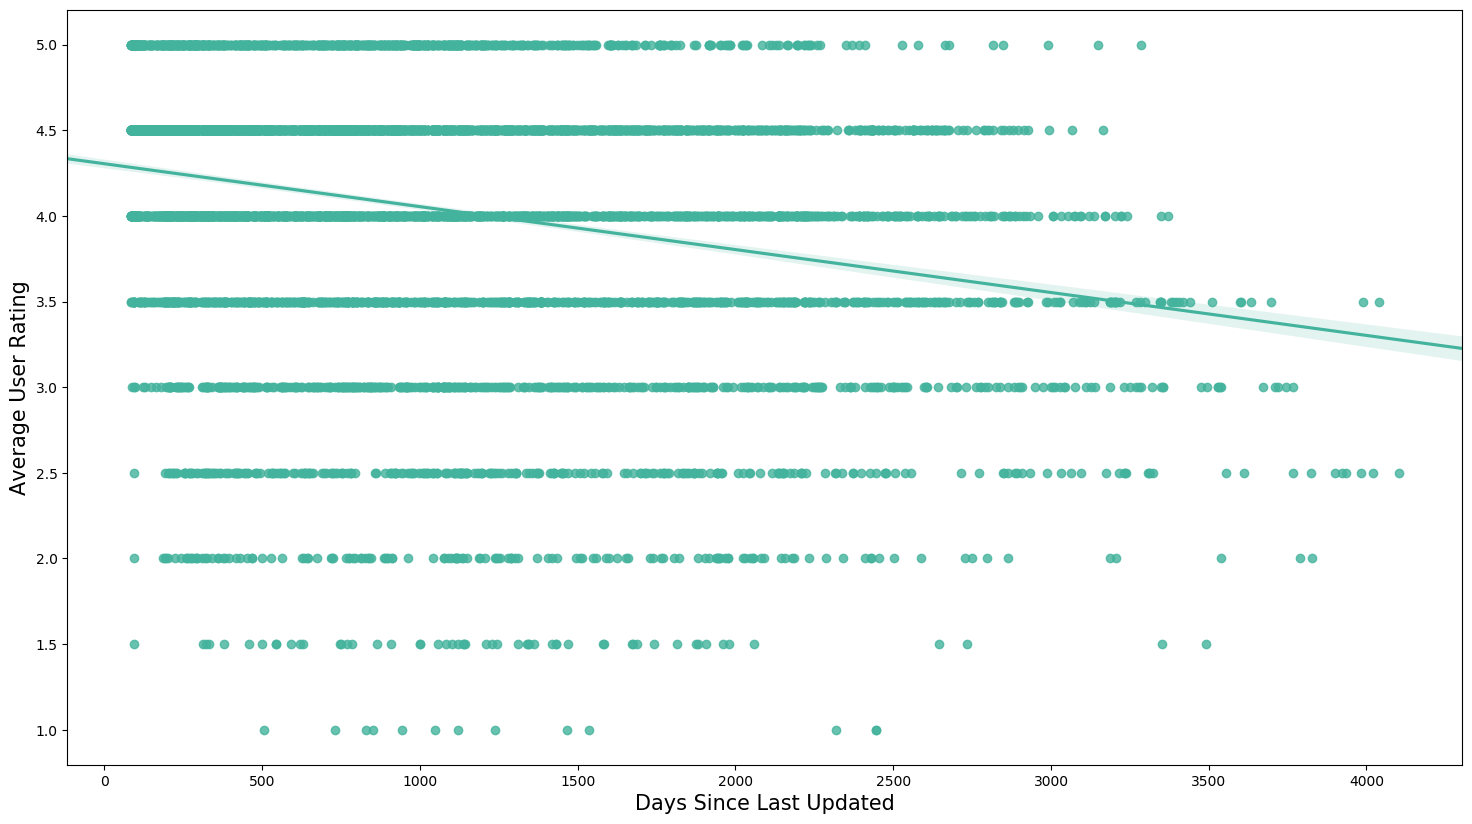

In [90]:
plt.figure(figsize=(18,10),dpi=100)
ax = sns.regplot(data=data, x='Days_Since_Last_Updated', y='Average User Rating', color = '#44b39d')
ax.set_ylabel('Average User Rating', fontsize = 15)
ax.set_xlabel('Days Since Last Updated', fontsize = 15)
plt.show()

## Genre Grouping<br>

In [91]:
data['Genres'] = data['Genres'].map(lambda x: x.replace("Games",""))

In [92]:
data['Genres'] = data['Genres'].map(lambda x: x.replace("Strategy",""))

In [93]:
data['Genres'] = data['Genres'].map(lambda x: x.replace(",",""))

In [94]:
data['Genres'] = data['Genres'].map(lambda x: x.replace(" ",""))

In [95]:
data.tail()

Name  Average User Rating  User Rating Count  \
16694                Smash Brickz Pro                  4.5              354.0   
16718                 Car Wash Empire                  5.0              658.0   
16724              Idle Zoo Tycoon 3D                  4.5             1197.0   
16729                         OG West                  5.0              267.0   
16874  Idle Waterpark 3D Fun Aquapark                  5.0              201.0   

       Price                                   In-app Purchases  \
16694    0.0  9.99,4.99,4.99,2.99,9.99,0.99,1.99,2.99,1.99,9.99   
16718    0.0                                               2.99   
16724    0.0                                                0.0   
16729    0.0   0.99,4.99,19.99,9.99,24.99,2.99,1.99,99.99,49.99   
16874    0.0                                                0.0   

                      Developer Age Rating  \
16694  Hong Kong JoyTap Limited         4+   
16718          Ksenia Aprelkova         4+   
16724             Marine Parker        12+   
16729    Star Ring Game Limited        12+   
16874          Regina Gallander         4+   

                                               Languages         Size  \
16694                                                 EN  211398656.0   
16718                                                 EN  206372864.0   
16724                                                 EN  131396608.0   
16729  AR, NL, EN, FR, DE, ID, IT, JA, KO, PT, RU, ZH...  282842112.0   
16874                                                 EN  325653504.0   

                        Genres  ... Release_Year Release_Month  \
16694                   Puzzle  ...         2019             6   
16718      PuzzleEntertainment  ...         2019             6   
16724                   Action  ...         2019             7   
16729  EntertainmentSimulation  ...         2019             6   
16874  EntertainmentSimulation  ...         2019             8   

       Days_Since_Last_Updated  Service_Period  Curent_Version_Release_Year  \
16694                       90             137                         2019   
16718                       88             143                         2019   
16724                       86             115                         2019   
16729                       84             130                         2019   
16874                       85              85                         2019   

       no_of_lang  Service_offered  Sum_of_Purchases No_of_Purchases  \
16694           5   Free+purchases             50.90              10   
16718           5   Free+purchases              2.99               1   
16724           5             Free              0.00               0   
16729          20   Free+purchases            215.91               9   
16874           5             Free              0.00               0   

       Size_class  
16694           1  
16718           1  
16724           1  
16729           2  
16874           2  

[5 rows x 22 columns]

In [96]:
def fillempty(x):
    if(x==""):
        return "Strategy"
    else:
        return x
data['Genres'] = data['Genres'].map(lambda x: fillempty(x))

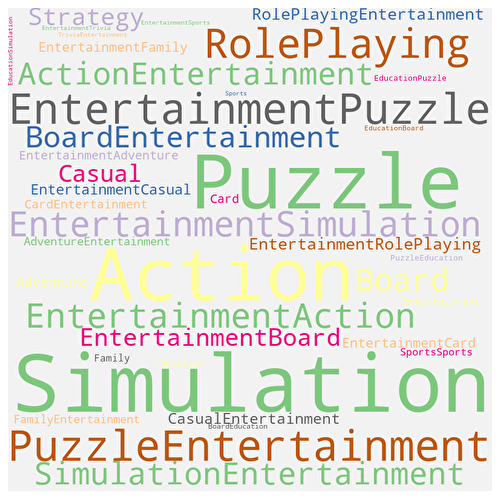

In [97]:
plt.figure(figsize=(8,8),dpi=80)
wc = WordCloud(width=800, height=800, margin=0, background_color="#f2f2f2", min_font_size = 10, 
               colormap=plt.get_cmap('Accent'),
               max_font_size = 500).generate(' '.join(data['Genres']))
plt.imshow(wc, interpolation='sinc')
plt.axis("off")
plt.show()

#### The remaining of the string are checked and grouped as follows:
<ul>
<li>Puzzle= Puzzle/Board</li>
<li>Adventure= Adventure/Role/Role Playing</li>
<li>Action = Action</li>
<li>Family = Family/Education</li>
</ul>

In [98]:
#Execute 2 times
def grouping(exp):
    if("Board" in exp):
        return exp.replace("Board","Puzzle")
    elif("Role" in exp):
        return exp.replace("Role","Adventure")
    elif("Playing" in exp):
        return exp.replace("Playing","Adventure")
    elif("Education" in exp):
        return exp.replace("Education","Family")
    else:
        return exp
    
data['Genres'] = data['Genres'].map(lambda x: grouping(x))

In [99]:
data['Genres'] = data['Genres'].map(lambda x: grouping(x))

In [100]:
data['Genres_Ent'] = data['Genres']

In [101]:
def checkent(x):
    if("Entertainment" in x):
        return 1
    else:
        return 0
data['Genres_Ent'] = data['Genres_Ent'].map(lambda x: checkent(x))

In [102]:
def rem(x):
    if("Entertainment" in x):
        return x.replace("Entertainment","")
    else:
        return x
data['Genres'] = data['Genres'].map(lambda x: rem(x))
data['Genres'] = data['Genres'].map(lambda x: fillempty(x))

In [103]:
print(data['Genres'].value_counts())
np.unique(data['Genres'])

Puzzle                                1793
Simulation                             991
Action                                 911
AdventureAdventure                     650
Casual                                 460
Card                                   298
Family                                 295
Adventure                              293
Strategy                               246
PuzzleFamily                            66
FamilyPuzzle                            64
SportsSports                            59
Trivia                                  52
Sports                                  52
Racing                                  35
Word                                    30
Music                                   26
Casino                                  21
FamilyFamily                            17
FamilySimulation                        17
PuzzleLifestyle                         16
TravelPuzzle                            15
UtilitiesPuzzle                         13
FinanceSimu

array(['Action', 'ActionBooks', 'ActionBusiness', 'ActionFood&Drink',
       'ActionLifestyle', 'ActionMusic', 'ActionReference',
       'ActionSocialNetworking', 'ActionSports', 'ActionUtilities',
       'Adventure', 'AdventureAdventure', 'AdventureAdventureBooks',
       'AdventureAdventureEducation', 'AdventureAdventureFood&Drink',
       'AdventureAdventureHealth&Fitness', 'AdventureAdventureLifestyle',
       'AdventureAdventureMusic', 'AdventureAdventureReference',
       'AdventureAdventureSocialNetworking', 'AdventureAdventureSports',
       'AdventureAdventureTravel', 'AdventureBooks', 'AdventureFamily',
       'AdventureFood&Drink', 'AdventureLifestyle', 'AdventureNavigation',
       'AdventurePhoto&Video', 'AdventureSocialNetworking',
       'AdventureUtilities', 'BooksAction', 'BooksAdventure',
       'BooksAdventureAdventure', 'BooksPuzzle', 'BooksWord', 'Business',
       'BusinessPuzzle', 'BusinessSimulation', 'BusinessTrivia', 'Card',
       'CardFamily', 'CardHealth&Fi

In [104]:
def regrouping(x):
    if("Puzzle" in x):
        return "Puzzle"
    elif("Action" in x):
        return "Action"
    elif("Adventure" in x):
        return "Adventure"
    elif("Family" in x):
        return "Family"
    else:
        return x

data['Genres'] = data['Genres'].map(lambda x: regrouping(x))

In [105]:
def work(x):
    if("Simulation" in x):
        return "Simulation"
    elif("Card" in x):
        return "Card"
    elif("Utilities" in x):
        return "Utilities"
    elif("Sports" in x):
        return "Sports"
    elif("Reference" in x):
        return "Reference"
    else:
        return x
    
data['Genres'] = data['Genres'].map(lambda x: work(x))

In [106]:
lt = ["Puzzle" ,"Simulation" ,"Adventure" ,"Action" ,"Card" ,"Casual" ,"Family" ,"Strategy" ,"Sports"]
def finalgrouping(x):
    if(x in lt):
        return x
    else:
        return "Others"

data['Genres'] = data['Genres'].map(lambda x: finalgrouping(x))

In [107]:
print(data['Genres'].value_counts())
np.unique(data['Genres'])

Puzzle        2062
Simulation    1069
Adventure     1054
Action         948
Casual         460
Family         384
Card           321
Strategy       246
Others         232
Sports         123
Name: Genres, dtype: int64


array(['Action', 'Adventure', 'Card', 'Casual', 'Family', 'Others',
       'Puzzle', 'Simulation', 'Sports', 'Strategy'], dtype=object)

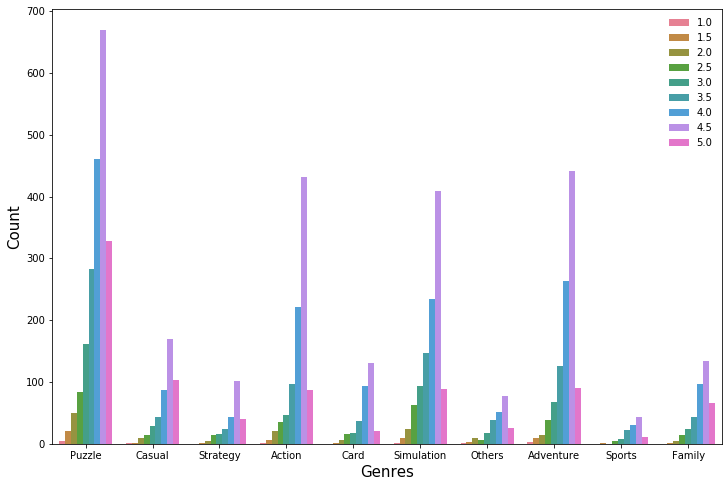

In [108]:
plt.figure(figsize=(12,8))
gen = sns.countplot(x='Genres',hue='Average User Rating',data=data,palette="husl")
gen.legend(loc='upper right', frameon=False)
plt.xlabel("Genres",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

### Data Distribution over different Genres against User Rating<br>

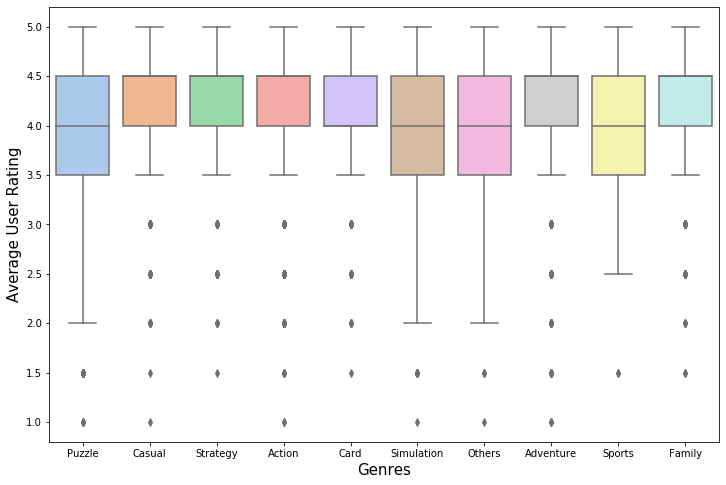

In [109]:
plt.figure(figsize=(12,8))
genb = sns.boxplot(data=data,x="Genres",y="Average User Rating",palette=sns.color_palette("pastel"))
plt.xlabel("Genres",fontsize=15)
plt.ylabel("Average User Rating",fontsize=15)
plt.show()

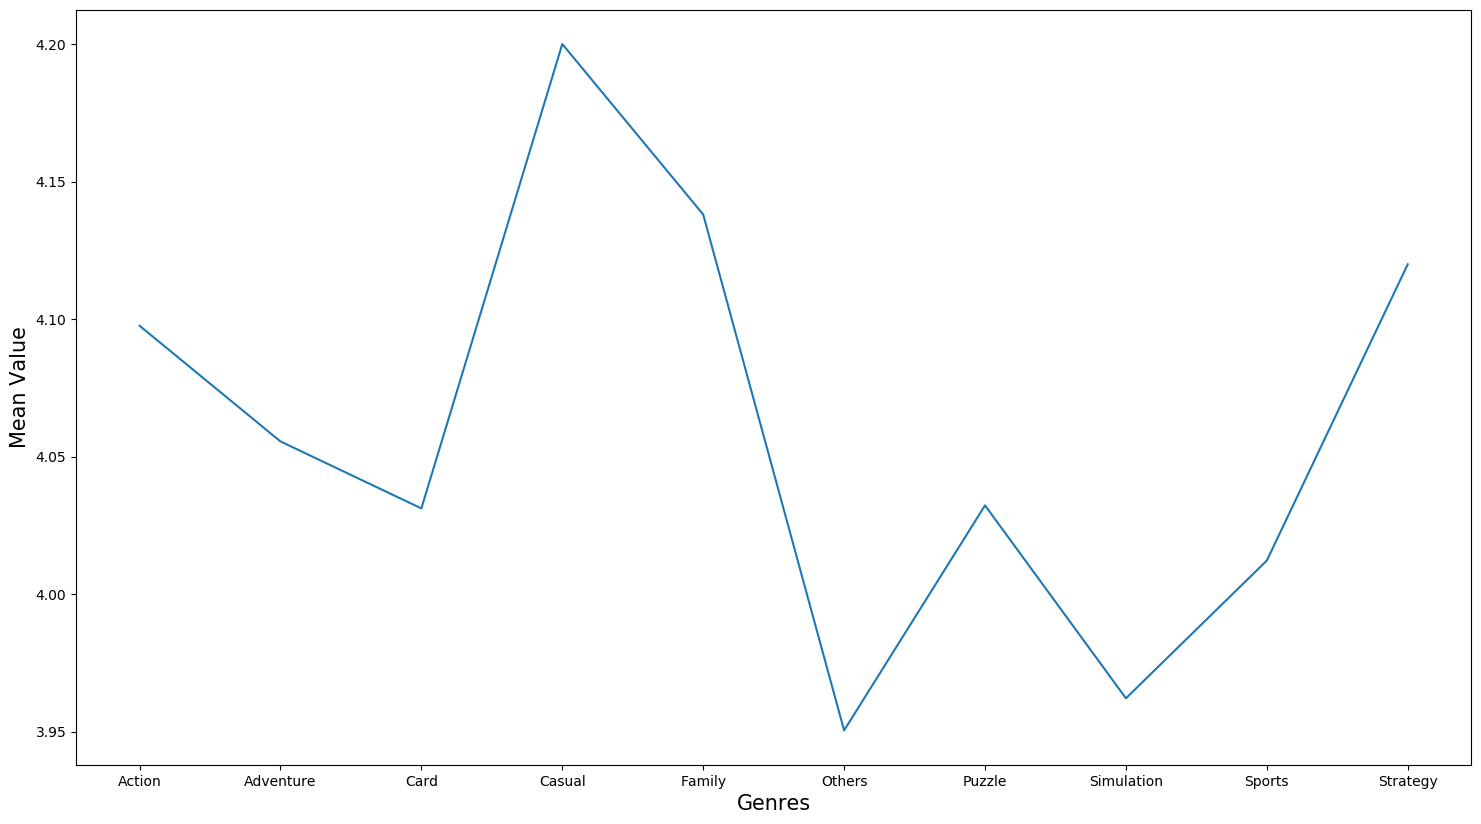

In [110]:
#Ploting Mean 
x=['Puzzle','Action','Adventure','Simulation','Family','Card','Casual','Others','Sports','Strategy']
y = [data[data["Genres"]=='Puzzle']["Average User Rating"].mean(),
     data[data["Genres"]=='Action']["Average User Rating"].mean(),
     data[data["Genres"]=='Adventure']["Average User Rating"].mean(),
     data[data["Genres"]=='Simulation']["Average User Rating"].mean(),
     data[data["Genres"]=='Family']["Average User Rating"].mean(),
     data[data["Genres"]=='Card']["Average User Rating"].mean(),
     data[data["Genres"]=='Casual']["Average User Rating"].mean(),
     data[data["Genres"]=='Others']["Average User Rating"].mean(),
     data[data["Genres"]=='Sports']["Average User Rating"].mean(),
     data[data["Genres"]=='Strategy']["Average User Rating"].mean(),]
plt.figure(figsize=(18,10),dpi=100)
ax = sns.lineplot(x,y,palette="cool")
ax.set_xlabel("Genres",fontsize=15)
ax.set_ylabel("Mean Value",fontsize=15)
plt.show()

### Casual and Family have less competition and have highest ratings than other genres
### Adventure , Action , Strategy game apps have high ratings 
### Apps belonging to Simulation and Others category are rated low ( $<$ 4.0)

### Genres_Ent column is produced from Genres having Entertainment as one of the category<br>

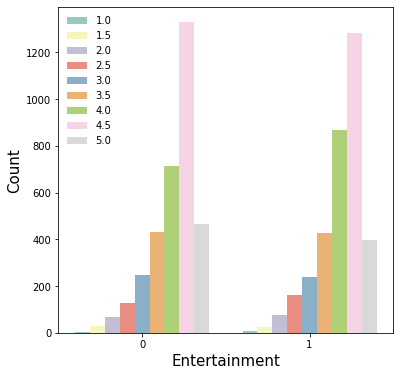

In [111]:
plt.figure(figsize=(6,6))
ent = sns.countplot(x='Genres_Ent',hue='Average User Rating',data=data,palette=sns.color_palette("Set3"))
ent.legend(loc='upper left', frameon=False)
plt.xlabel("Entertainment",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

### From the above graph it is clear that Entertainment has no effect on Average User Rating

### More plots with Genre<br>

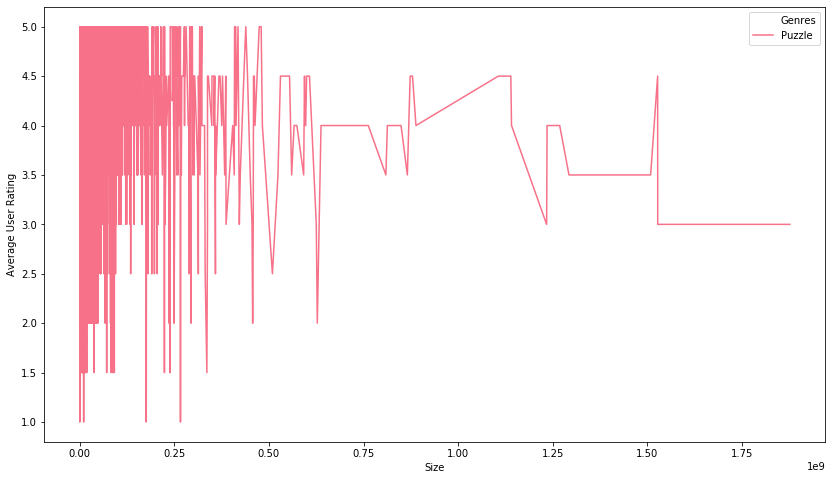

In [112]:
plt.figure(figsize=(14,8))
sns.lineplot(x="Size",y="Average User Rating",hue="Genres",data=data[data['Genres']=='Puzzle'],palette="husl")
plt.show()

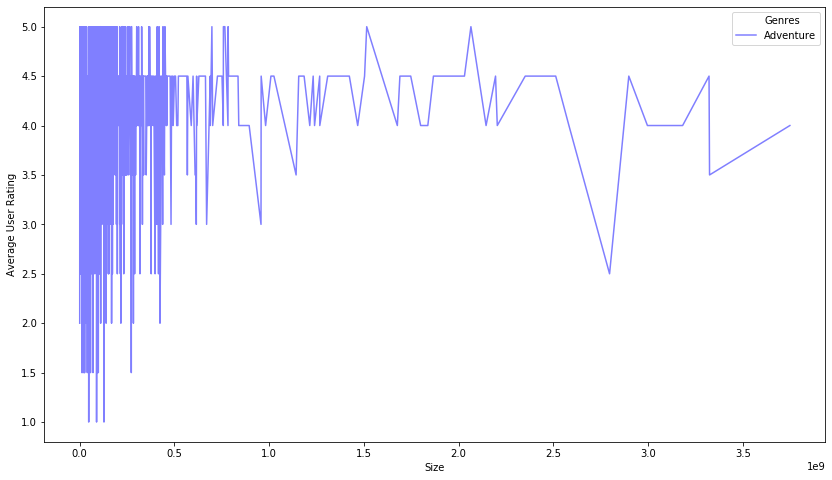

In [113]:
plt.figure(figsize=(14,8))
sns.lineplot(x="Size",y="Average User Rating",hue="Genres",data=data[data['Genres']=='Adventure'],palette="cool")
plt.show()

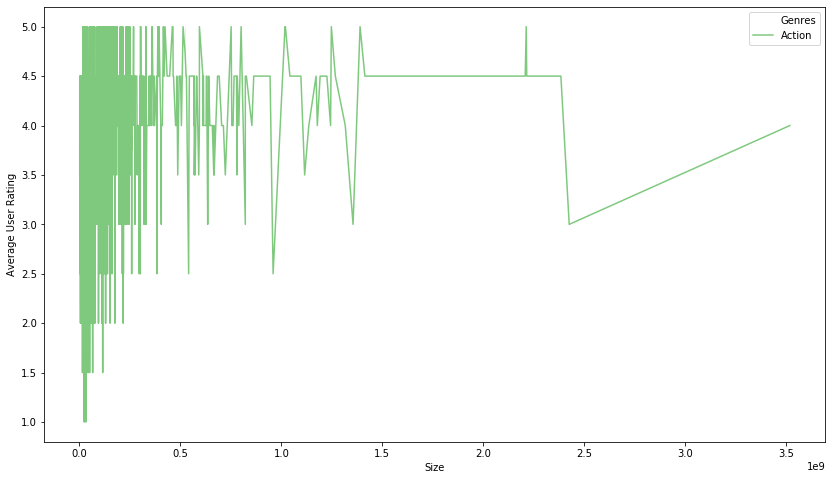

In [114]:
plt.figure(figsize=(14,8))
sns.lineplot(x="Size",y="Average User Rating",hue="Genres",data=data[data['Genres']=='Action'],palette="Accent")
plt.show()

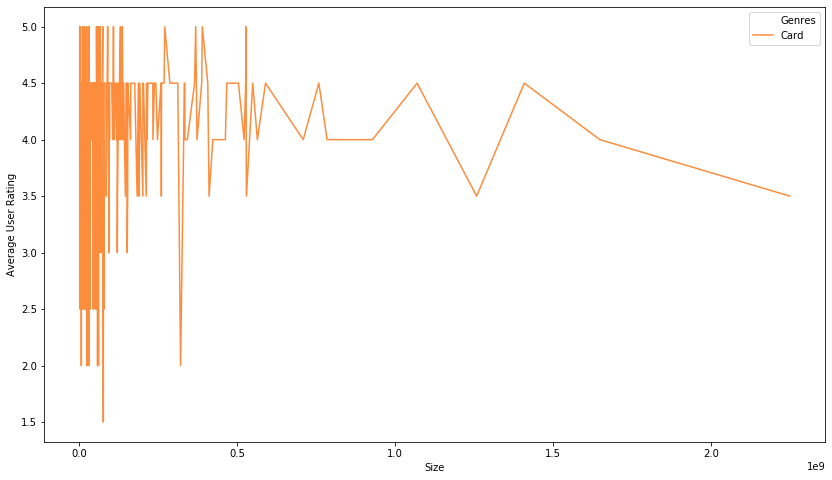

In [115]:
plt.figure(figsize=(14,8))
sns.lineplot(x="Size",y="Average User Rating",hue="Genres",data=data[data['Genres']=='Card'],palette="YlOrRd")
plt.show()

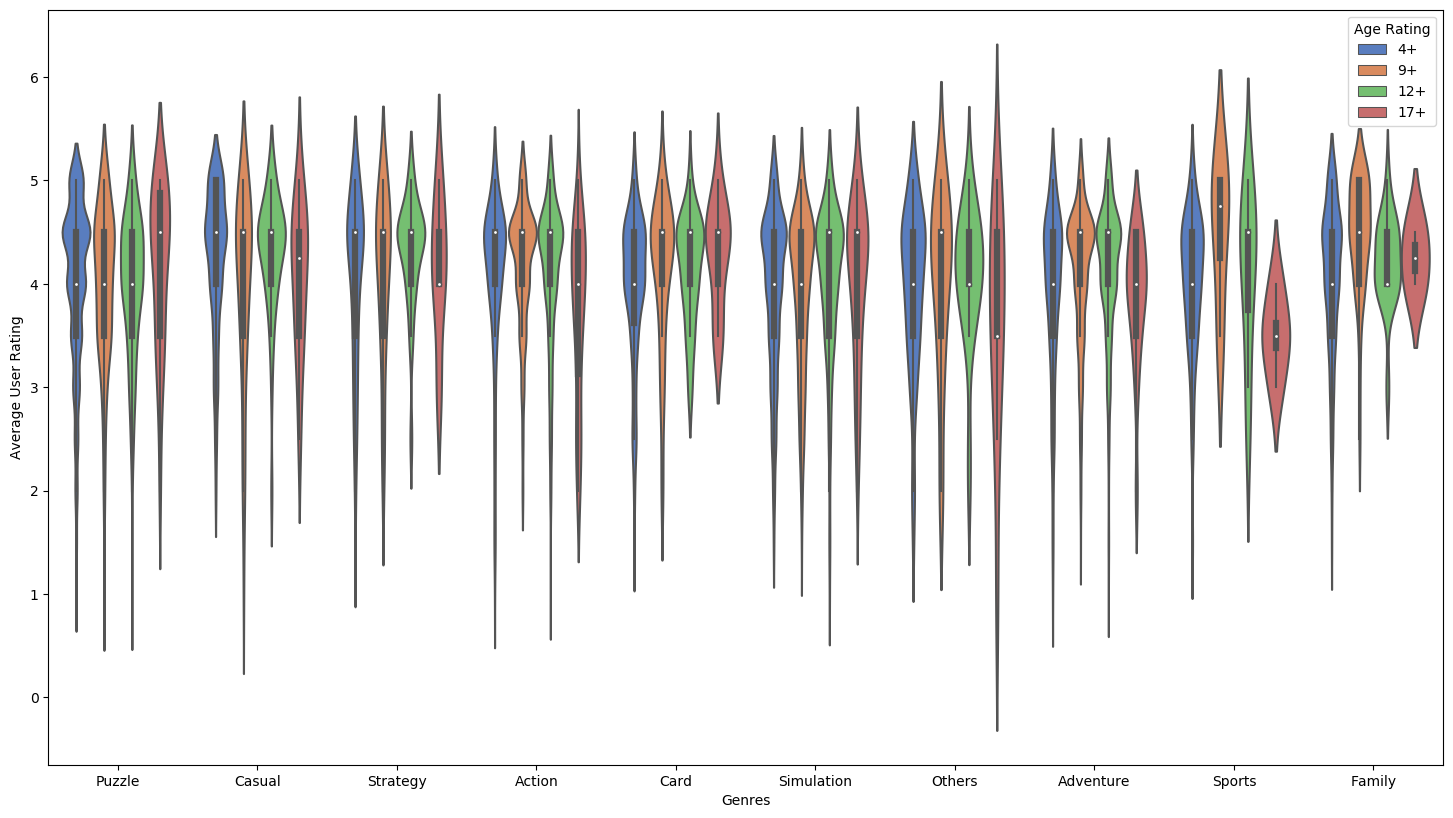

In [116]:
plt.figure(figsize=(18,10),dpi=100)
ax = sns.violinplot(x="Genres", y="Average User Rating", hue="Age Rating",data=data, palette="muted")
plt.show()

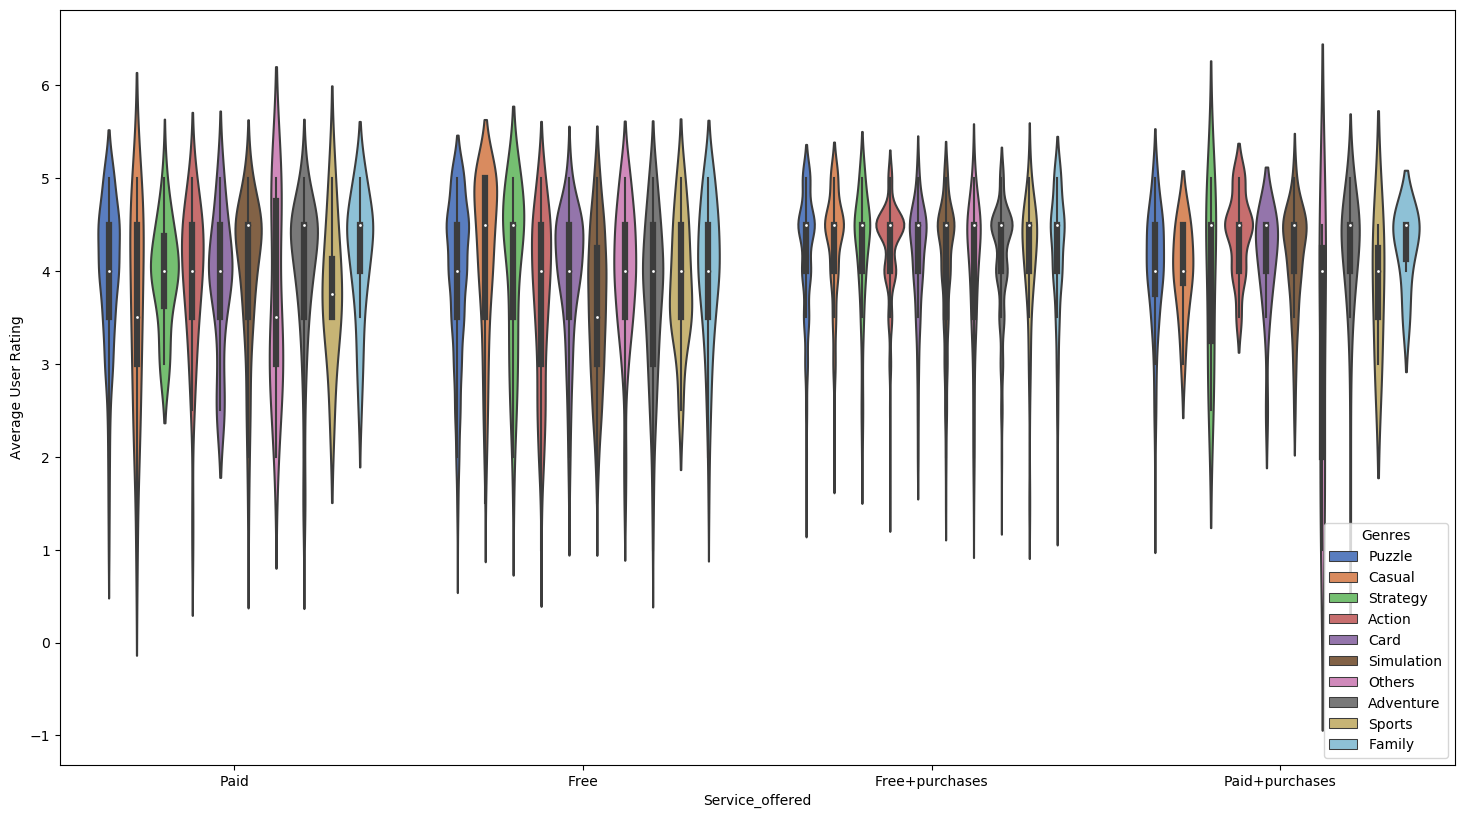

In [117]:
plt.figure(figsize=(18,10),dpi=100)
ax = sns.violinplot(x="Service_offered", y="Average User Rating", hue="Genres",data=data, palette="muted")
plt.show()

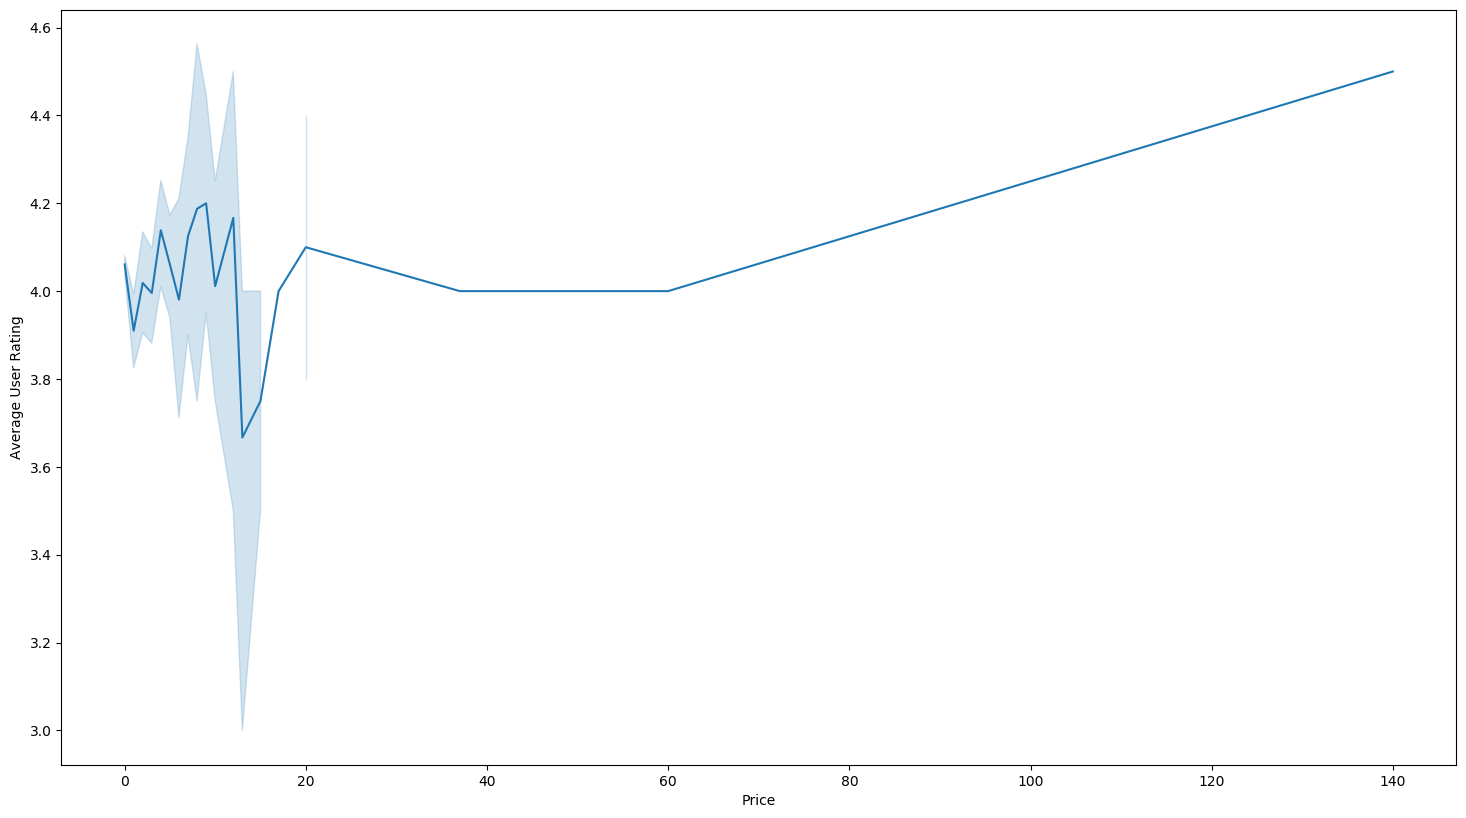

In [118]:
plt.figure(figsize=(18,10),dpi=100)
ax = sns.lineplot(x="Price", y="Average User Rating" , data=data, palette="muted")
plt.show()

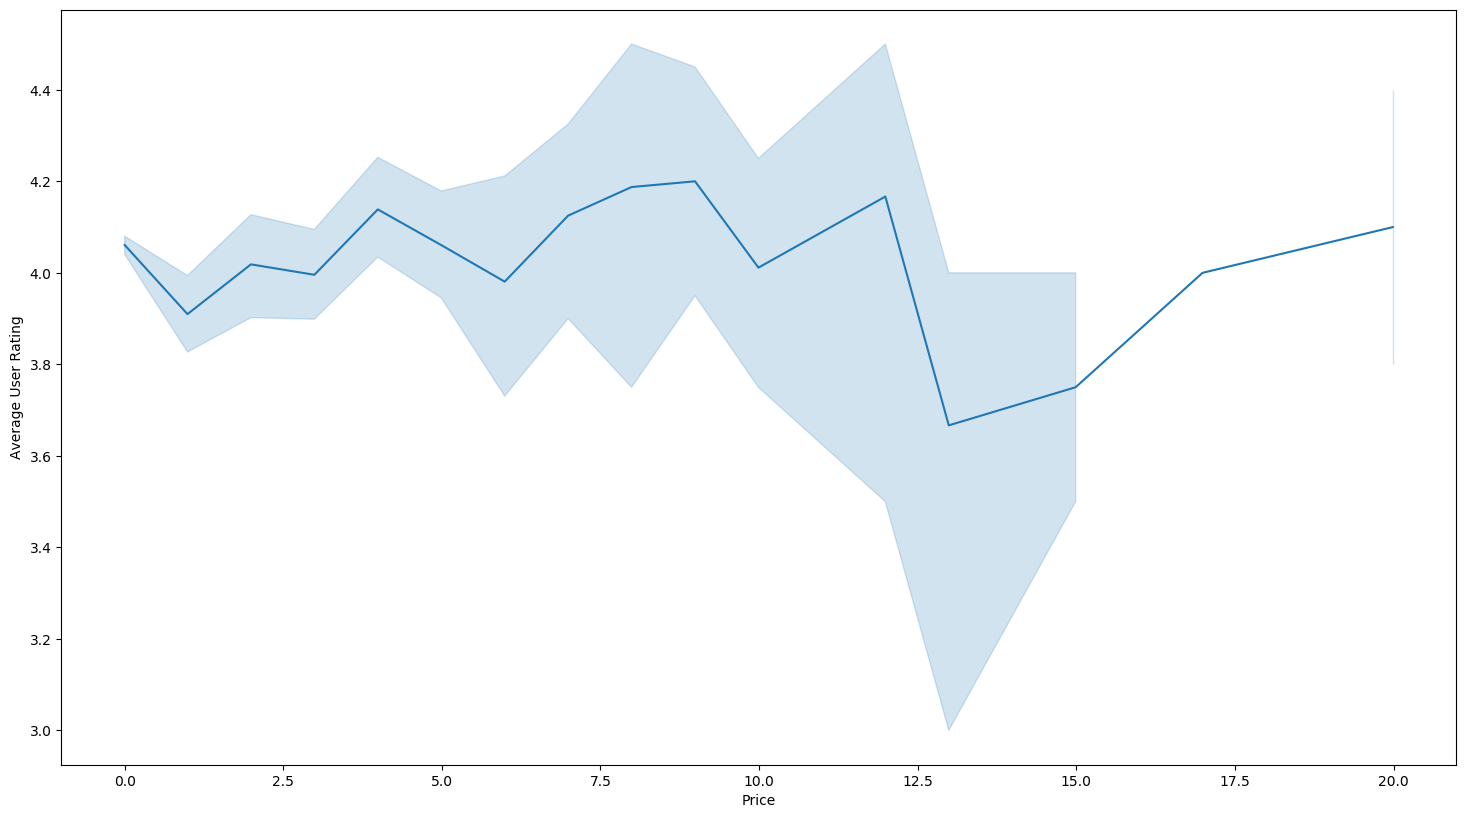

In [119]:
plt.figure(figsize=(18,10),dpi=100)
ax = sns.lineplot(x="Price", y="Average User Rating" , data=data[data['Price'] < 20], palette="muted")
plt.show()

## Summarising the Inferences

### (1)Free apps with In app purchases is the best strategy to score $>$ 4.0 rating irrespective of any genre
### (2)Games with frequent updates and patches hold high ratings
### (3)Users enjoy more games designed for 9+ and 12+ age rating content in every genre
### (4)Almost 56% of the developers focus on free games and place In-App Purchase as their strategy for income
### (5)Over the recent years apps show hike in update size
### (6)Paid Games ranging between 2 to 10 score $>=$ 4.0 User Rating
### (7)Users enjoy Card , Simulation , Puzzle games with more matured content i.e games targetted for 17+ age and above
### (8)For simple games , target the size between 10MB to 250MB
### (9)For complex games , target the size between 250MB to 500MB
### (10)Games above 1.5GB can expect to score above 3.5 rating , provided other features are also balanced
### (11)Casual and Family/Educational games have less competition and are highest rated
### (12)Puzzle games are less above 400MB to achieve score $>=$ 4.0
### (13)Adventure games can concentrate from 300MB to 2.5GB size to achieve score $>=$ 4.0
### (14)Action games from 1.5GB to 2.4GB size score $>=$ 4.5
### (15)Card games can concentrate from 350MB to 1.5GB to score $>=$ 4.0